Disclaimer: The following codes and files are mostly copied & edited from the kaggle notebook by Aradhana Pratap, Sagarika Jana, Shreya Mankar.
Link :https://www.kaggle.com/code/aradhanapratap/emotion-detection-using-multimodal-ai?kernelSessionId=96617272

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchtext
import torch.nn as nn
import torch.nn.functional as F
import time


In [2]:
! wget https://huggingface.co/datasets/declare-lab/MELD/resolve/main/MELD.Raw.tar.gz

--2024-01-01 12:29:12--  https://huggingface.co/datasets/declare-lab/MELD/resolve/main/MELD.Raw.tar.gz
Resolving huggingface.co (huggingface.co)... 18.164.174.118, 18.164.174.23, 18.164.174.17, ...
Connecting to huggingface.co (huggingface.co)|18.164.174.118|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/e5/f9/e5f9b3280b3cb63549fb6376cd84286e8bf7cade60967f984e192dda5701e74b/a56b4407d574195cbce470d86f9c9d72fcfea59b0e34502ecd4babee4a5c613e?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27MELD.Raw.tar.gz%3B+filename%3D%22MELD.Raw.tar.gz%22%3B&response-content-type=application%2Fgzip&Expires=1704371352&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcwNDM3MTM1Mn19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy9lNS9mOS9lNWY5YjMyODBiM2NiNjM1NDlmYjYzNzZjZDg0Mjg2ZThiZjdjYWRlNjA5NjdmOTg0ZTE5MmRkYTU3MDFlNzRiL2E1NmI0NDA3ZDU3NDE5NWNiY2U0NzBkODZmOWM5ZDcyZ

In [3]:
! tar -zxvf /content/MELD.Raw.tar.gz
# Extracts entire MELD dataset

MELD.Raw/
MELD.Raw/train.tar.gz
MELD.Raw/dev.tar.gz
MELD.Raw/test_sent_emo.csv
MELD.Raw/._train_splits
MELD.Raw/dev_sent_emo.csv
MELD.Raw/README.txt
MELD.Raw/test.tar.gz


In [4]:
! tar -zxvf /content/MELD.Raw/dev.tar.gz
# The development set is used for tuning model hyperparameters and validating
# model performance during training.

dev_splits_complete/dia97_utt3.mp4
dev_splits_complete/dia32_utt4.mp4
dev_splits_complete/dia18_utt8.mp4
dev_splits_complete/dia30_utt18.mp4
dev_splits_complete/dia13_utt10.mp4
dev_splits_complete/dia27_utt7.mp4
dev_splits_complete/dia32_utt13.mp4
dev_splits_complete/dia4_utt14.mp4
dev_splits_complete/dia47_utt2.mp4
dev_splits_complete/dia9_utt7.mp4
dev_splits_complete/dia56_utt10.mp4
dev_splits_complete/dia10_utt5.mp4
dev_splits_complete/dia84_utt3.mp4
dev_splits_complete/dia97_utt15.mp4
dev_splits_complete/dia19_utt16.mp4
dev_splits_complete/dia30_utt0.mp4
dev_splits_complete/dia16_utt4.mp4
dev_splits_complete/dia104_utt3.mp4
dev_splits_complete/dia85_utt13.mp4
dev_splits_complete/dia25_utt3.mp4
dev_splits_complete/dia113_utt2.mp4
dev_splits_complete/dia53_utt5.mp4
dev_splits_complete/dia1_utt4.mp4
dev_splits_complete/dia7_utt3.mp4
dev_splits_complete/dia73_utt0.mp4
dev_splits_complete/dia62_utt4.mp4
dev_splits_complete/dia59_utt4.mp4
dev_splits_complete/dia90_utt6.mp4
dev_splits_com

In [5]:
! tar -zxvf /content/MELD.Raw/test.tar.gz

./._output_repeated_splits_test
./output_repeated_splits_test/
./output_repeated_splits_test/._dia47_utt11.mp4
./output_repeated_splits_test/dia47_utt11.mp4
./output_repeated_splits_test/._dia35_utt2.mp4
./output_repeated_splits_test/dia35_utt2.mp4
./output_repeated_splits_test/._dia47_utt9.mp4
./output_repeated_splits_test/dia47_utt9.mp4
./output_repeated_splits_test/._dia167_utt14.mp4
./output_repeated_splits_test/dia167_utt14.mp4
./output_repeated_splits_test/._dia232_utt4.mp4
./output_repeated_splits_test/dia232_utt4.mp4
./output_repeated_splits_test/._dia34_utt2.mp4
./output_repeated_splits_test/dia34_utt2.mp4
./output_repeated_splits_test/dia268_utt8.mp4
./output_repeated_splits_test/._dia233_utt4.mp4
./output_repeated_splits_test/dia233_utt4.mp4
./output_repeated_splits_test/._dia137_utt0.mp4
./output_repeated_splits_test/dia137_utt0.mp4
./output_repeated_splits_test/._dia136_utt0.mp4
./output_repeated_splits_test/dia136_utt0.mp4
./output_repeated_splits_test/._dia28_utt7.mp4
./

In [6]:
! tar -zxvf /content/MELD.Raw/train.tar.gz

Streaming output truncated to the last 5000 lines.
train_splits/dia6_utt17.mp4
train_splits/dia598_utt1.mp4
train_splits/dia481_utt7.mp4
train_splits/dia366_utt14.mp4
train_splits/dia295_utt8.mp4
train_splits/dia25_utt3.mp4
train_splits/dia508_utt22.mp4
train_splits/dia67_utt14.mp4
train_splits/dia37_utt2.mp4
train_splits/dia858_utt2.mp4
train_splits/dia767_utt6.mp4
train_splits/dia820_utt3.mp4
train_splits/dia901_utt14.mp4
train_splits/dia149_utt3.mp4
train_splits/dia630_utt5.mp4
train_splits/dia359_utt1.mp4
train_splits/dia722_utt3.mp4
train_splits/dia327_utt0.mp4
train_splits/dia395_utt7.mp4
train_splits/dia367_utt3.mp4
train_splits/dia828_utt4.mp4
train_splits/dia652_utt6.mp4
train_splits/dia208_utt16.mp4
train_splits/dia767_utt0.mp4
train_splits/dia720_utt7.mp4
train_splits/dia629_utt7.mp4
train_splits/dia696_utt0.mp4
train_splits/dia179_utt14.mp4
train_splits/dia521_utt0.mp4
train_splits/dia336_utt10.mp4
train_splits/dia793_utt10.mp4
train_splits/dia0_utt2.mp4
train_splits/dia717

TRAIN DATA

In [7]:
train_sent_emo = pd.read_csv("/content/train_sent_emo.csv")

In [8]:
train_sent_emo.head()

Sr No.                                          Utterance          Speaker  \
0       1  also I was the point person on my companys tr...         Chandler   
1       2                   You mustve had your hands full.  The Interviewer   
2       3                            That I did. That I did.         Chandler   
3       4      So lets talk a little bit about your duties.  The Interviewer   
4       5                             My duties?  All right.         Chandler   

    Emotion Sentiment  Dialogue_ID  Utterance_ID  Season  Episode  \
0   neutral   neutral            0             0       8       21   
1   neutral   neutral            0             1       8       21   
2   neutral   neutral            0             2       8       21   
3   neutral   neutral            0             3       8       21   
4  surprise  positive            0             4       8       21   

      StartTime       EndTime  
0  00:16:16,059  00:16:21,731  
1  00:16:21,940  00:16:23,442  
2  00:16:23,442  00:16:26,389  
3  00:16:26,820  00:16:29,572  
4  00:16:34,452  00:16:40,917

In [9]:
train_sent_emo.columns

Index(['Sr No.', 'Utterance', 'Speaker', 'Emotion', 'Sentiment', 'Dialogue_ID',
       'Utterance_ID', 'Season', 'Episode', 'StartTime', 'EndTime'],
      dtype='object')

In [10]:
train_sent_emo.shape

(9989, 11)

In [11]:
import cv2
import os

In [12]:
path = '/content/train_splits/dia0_utt0.mp4'
cap = cv2.VideoCapture(path)

frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))	# 영상의 넓이(가로) 프레임
frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))	# 영상의 높이(세로) 프레임
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))


frame_size = (frameWidth, frameHeight)
print('frame_size={}'.format(frame_size))
print(length)

frame_size=(1280, 720)
136


In [13]:
path = '/content/train_splits/dia0_utt1.mp4'
cap = cv2.VideoCapture(path)

frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))	# 영상의 넓이(가로) 프레임
frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))	# 영상의 높이(세로) 프레임
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

frame_size = (frameWidth, frameHeight)
print('frame_size={}'.format(frame_size))
print(length)

frame_size=(1280, 720)
36


In [14]:
path = '/content/train_splits/dia0_utt2.mp4'
cap = cv2.VideoCapture(path)

frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))	# 영상의 넓이(가로) 프레임
frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))	# 영상의 높이(세로) 프레임
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

frame_size = (frameWidth, frameHeight)
print('frame_size={}'.format(frame_size))
print(length)

frame_size=(1280, 720)
70


TEST DATA

In [15]:
test_sent_emo = pd.read_csv("/content/MELD.Raw/test_sent_emo.csv")

In [16]:
test_sent_emo.head()

Sr No.                                          Utterance Speaker  \
0       1  Why do all youre coffee mugs have numbers on ...    Mark   
1       2  Oh. Thats so Monica can keep track. That way ...  Rachel   
2       3                                       Y'know what?  Rachel   
3      19                     Come on, Lydia, you can do it.    Joey   
4      20                                              Push!    Joey   

    Emotion Sentiment  Dialogue_ID  Utterance_ID  Season  Episode  \
0  surprise  positive            0             0       3       19   
1     anger  negative            0             1       3       19   
2   neutral   neutral            0             2       3       19   
3   neutral   neutral            1             0       1       23   
4       joy  positive            1             1       1       23   

      StartTime       EndTime  
0  00:14:38,127  00:14:40,378  
1  00:14:40,629  00:14:47,385  
2  00:14:56,353  00:14:57,520  
3   0:10:44,769   0:10:46,146  
4   0:10:46,146   0:10:46,833

In [17]:
test_sent_emo.columns

Index(['Sr No.', 'Utterance', 'Speaker', 'Emotion', 'Sentiment', 'Dialogue_ID',
       'Utterance_ID', 'Season', 'Episode', 'StartTime', 'EndTime'],
      dtype='object')

In [18]:
test_sent_emo.shape

(2610, 11)

DEV DATA

In [19]:
dev_sent_emo = pd.read_csv("/content/MELD.Raw/dev_sent_emo.csv")

In [20]:
dev_sent_emo.head()

Sr No.                                          Utterance   Speaker  \
0       1     Oh my God, hes lost it. Hes totally lost it.    Phoebe   
1       2                                              What?    Monica   
2       3  Or! Or, we could go to the bank, close our acc...      Ross   
3       4                                   Youre a genius!  Chandler   
4       5            Aww, man, now we wont be bank buddies!      Joey   

    Emotion Sentiment  Dialogue_ID  Utterance_ID  Season  Episode  \
0   sadness  negative            0             0       4        7   
1  surprise  negative            0             1       4        7   
2   neutral   neutral            1             0       4        4   
3       joy  positive            1             1       4        4   
4   sadness  negative            1             2       4        4   

      StartTime       EndTime  
0  00:20:57,256  00:21:00,049  
1  00:21:01,927  00:21:03,261  
2  00:12:24,660  00:12:30,915  
3  00:12:32,334  00:12:33,960  
4  00:12:34,211  00:12:37,505

In [21]:
dev_sent_emo.columns

Index(['Sr No.', 'Utterance', 'Speaker', 'Emotion', 'Sentiment', 'Dialogue_ID',
       'Utterance_ID', 'Season', 'Episode', 'StartTime', 'EndTime'],
      dtype='object')

In [22]:
dev_sent_emo.shape

(1109, 11)

# **Additional Exploratory Data Analysis (EDA)**
a more in-depth exploratory data analysis to understand the distribution of emotions in each set, check for missing values, and explore other relevant statistics.
Visualize the distribution of emotions across different classes



In [23]:
# Check for missing values in the training set
print("Missing Values in Train Set:")
print(train_sent_emo.isnull().sum())

# Check for missing values in the test set
print("\nMissing Values in Test Set:")
print(test_sent_emo.isnull().sum())

# Check for missing values in the development set
print("\nMissing Values in Dev Set:")
print(dev_sent_emo.isnull().sum())


Missing Values in Train Set:
Sr No.          0
Utterance       0
Speaker         0
Emotion         0
Sentiment       0
Dialogue_ID     0
Utterance_ID    0
Season          0
Episode         0
StartTime       0
EndTime         0
dtype: int64

Missing Values in Test Set:
Sr No.          0
Utterance       0
Speaker         0
Emotion         0
Sentiment       0
Dialogue_ID     0
Utterance_ID    0
Season          0
Episode         0
StartTime       0
EndTime         0
dtype: int64

Missing Values in Dev Set:
Sr No.          0
Utterance       0
Speaker         0
Emotion         0
Sentiment       0
Dialogue_ID     0
Utterance_ID    0
Season          0
Episode         0
StartTime       0
EndTime         0
dtype: int64


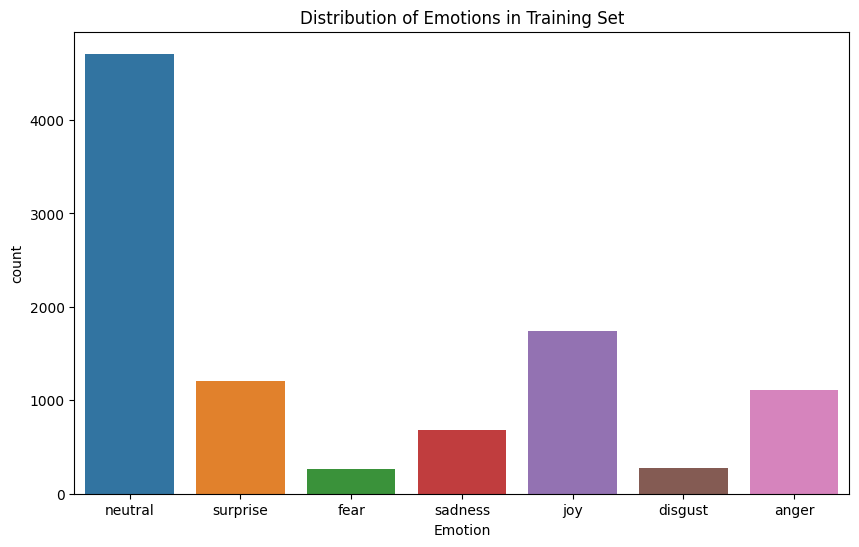

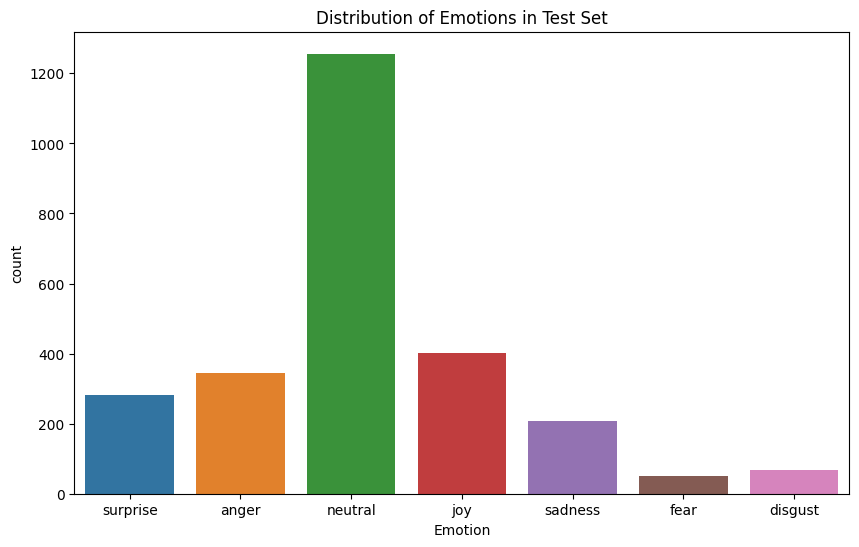

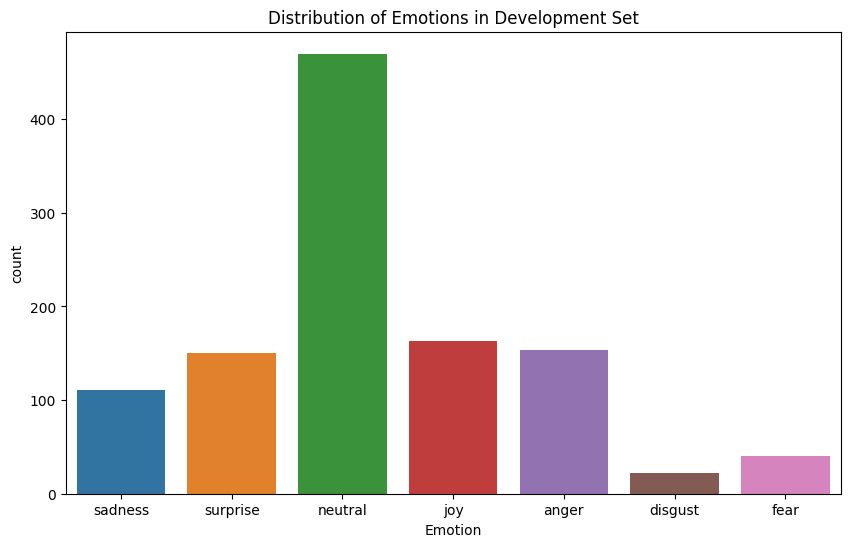

In [ ]:
# Plot the distribution of emotions in the training set
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='Emotion', data=train_sent_emo)
plt.title('Distribution of Emotions in Training Set')
plt.show()

# Plot the distribution of emotions in the test set
plt.figure(figsize=(10, 6))
sns.countplot(x='Emotion', data=test_sent_emo)
plt.title('Distribution of Emotions in Test Set')
plt.show()

# Plot the distribution of emotions in the development set
plt.figure(figsize=(10, 6))
sns.countplot(x='Emotion', data=dev_sent_emo)
plt.title('Distribution of Emotions in Development Set')
plt.show()

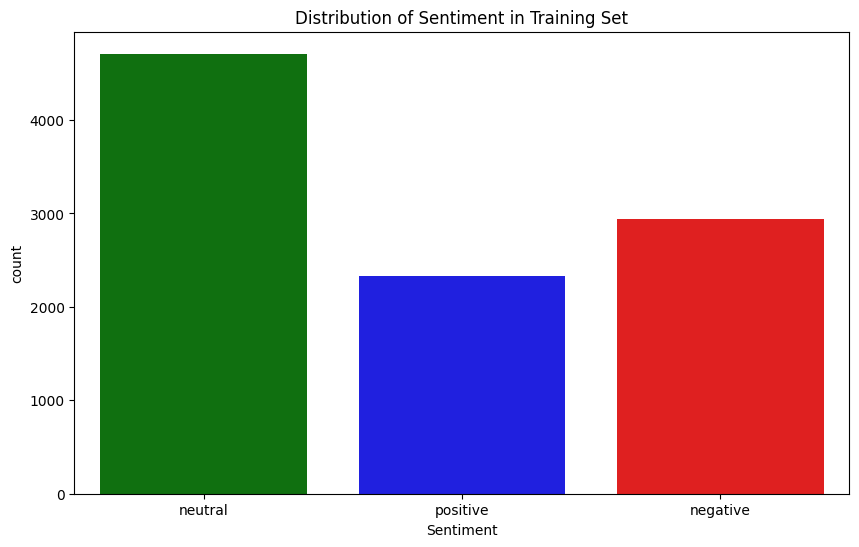

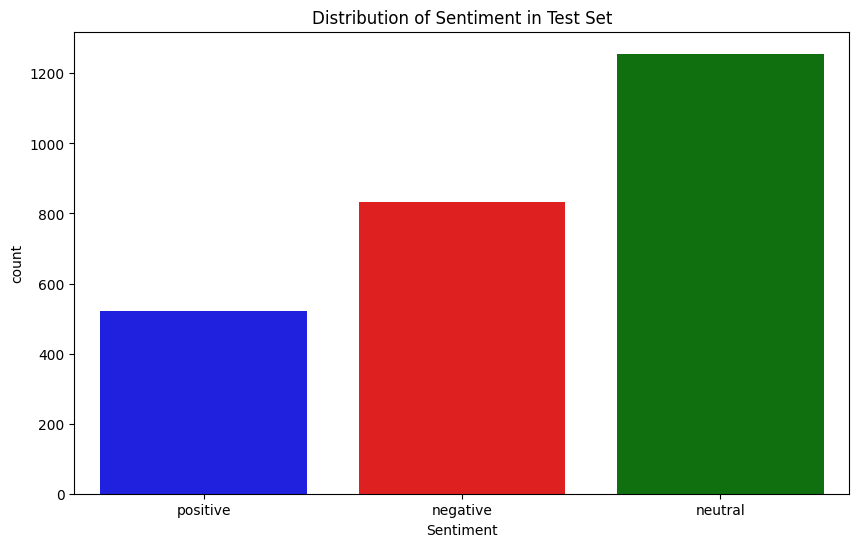

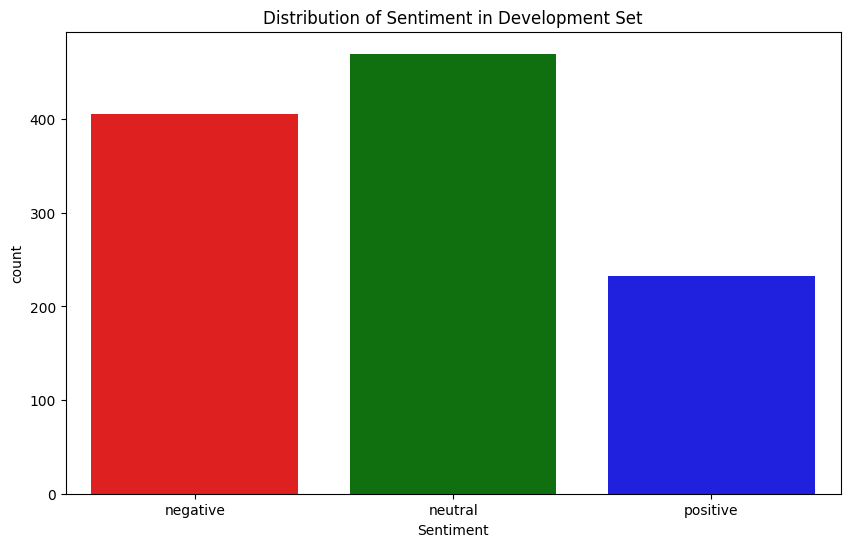

In [24]:
colors = {'positive': 'blue', 'neutral': 'green', 'negative': 'red'}

# Plot the distribution of Sentiment in the training set
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=train_sent_emo, palette=colors)
plt.title('Distribution of Sentiment in Training Set')
plt.show()

# Plot the distribution of Sentiment in the test set
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=test_sent_emo, palette=colors)
plt.title('Distribution of Sentiment in Test Set')
plt.show()

# Plot the distribution of Sentiment in the development set
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=dev_sent_emo, palette=colors)
plt.title('Distribution of Sentiment in Development Set')
plt.show()

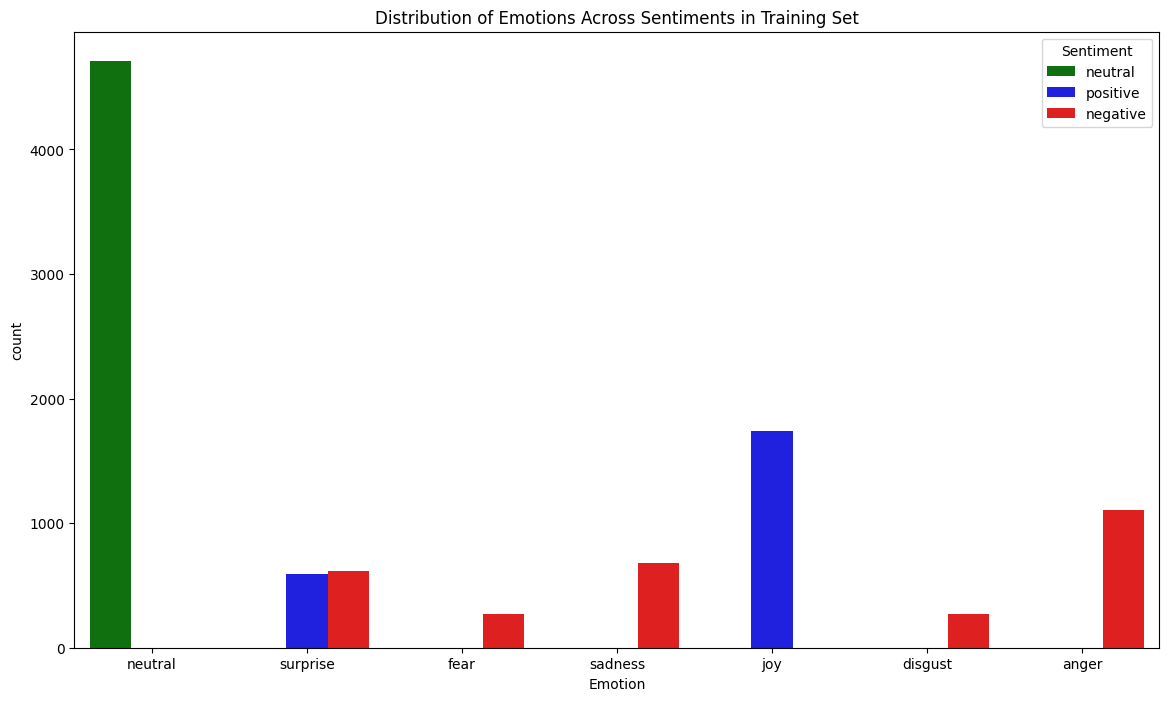

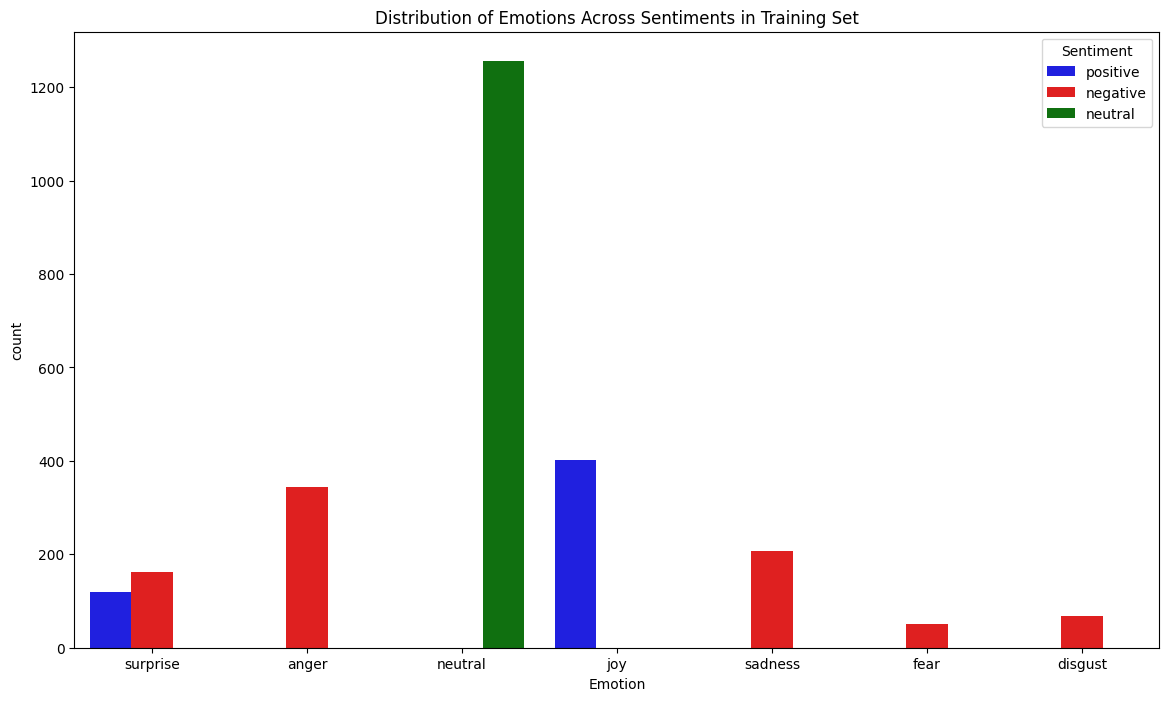

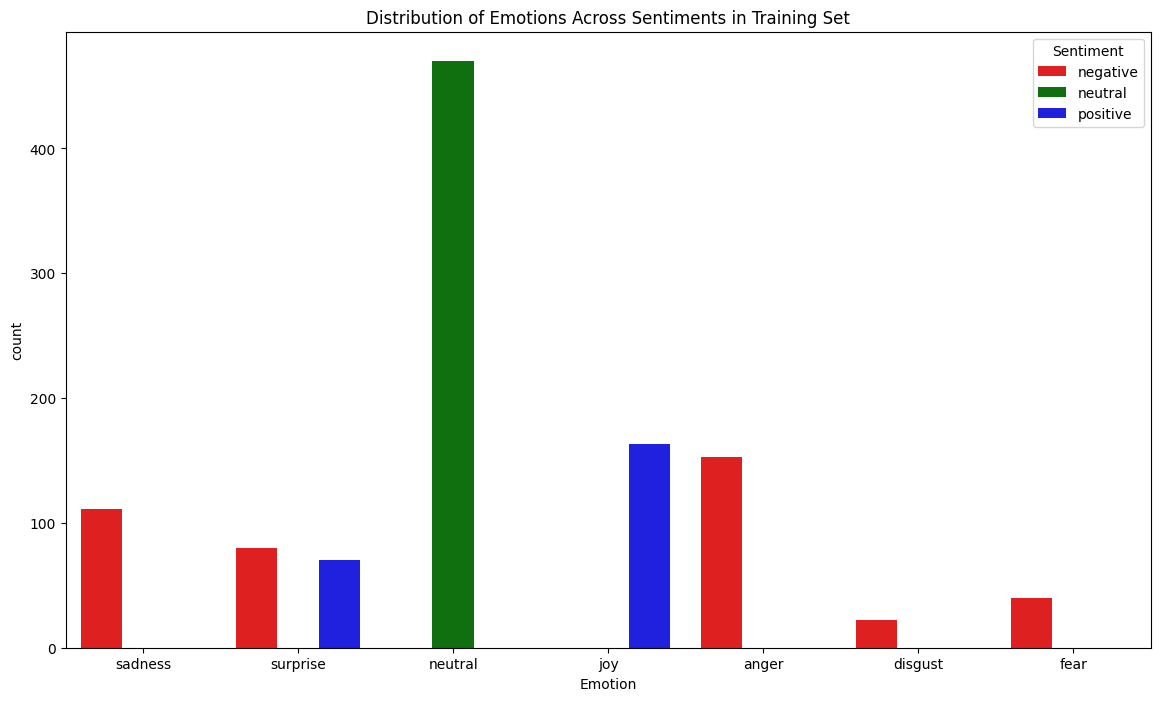

In [25]:
colors = {'positive': 'blue', 'neutral': 'green', 'negative': 'red'}

# Visualize the distribution of emotions across different classes
plt.figure(figsize=(14, 8))
sns.countplot(x='Emotion', hue='Sentiment', data=train_sent_emo, palette=colors)
plt.title('Distribution of Emotions Across Sentiments in Training Set')
plt.show()

# Similar visualization for test set
plt.figure(figsize=(14, 8))
sns.countplot(x='Emotion', hue='Sentiment', data=test_sent_emo, palette=colors)
plt.title('Distribution of Emotions Across Sentiments in Training Set')
plt.show()

# Similar visualization for development set
plt.figure(figsize=(14, 8))
sns.countplot(x='Emotion', hue='Sentiment', data=dev_sent_emo, palette=colors)
plt.title('Distribution of Emotions Across Sentiments in Training Set')
plt.show()


In [26]:
# Display basic statistics of the training set
print("Basic Statistics of Training Set:")
print(train_sent_emo.describe())

# Display basic statistics of the test set
print("\nBasic Statistics of Test Set:")
print(test_sent_emo.describe())

# Display basic statistics of the development set
print("\nBasic Statistics of Dev Set:")
print(dev_sent_emo.describe())

Basic Statistics of Training Set:
             Sr No.  Dialogue_ID  Utterance_ID       Season      Episode
count   9989.000000  9989.000000    9989.00000  9989.000000  9989.000000
mean    5262.373511   526.549304       6.14516     4.853739    12.697467
std     3032.169169   302.464741       4.96027     2.389599     7.220051
min        1.000000     0.000000       0.00000     1.000000     1.000000
25%     2641.000000   261.000000       2.00000     3.000000     6.000000
50%     5267.000000   531.000000       5.00000     5.000000    12.000000
75%     7891.000000   795.000000       9.00000     7.000000    19.000000
max    10478.000000  1038.000000      23.00000     9.000000    25.000000

Basic Statistics of Test Set:
            Sr No.  Dialogue_ID  Utterance_ID       Season      Episode
count  2610.000000  2610.000000   2610.000000  2610.000000  2610.000000
mean   1382.552107   140.368582      5.918774     4.804981    12.497318
std     793.009903    79.549222      4.991015     2.247074    

data_helpers_1.py, baseline_1.py 불러오기

In [28]:
from google.colab import files
file_uploaded = files.upload()

Saving data_helpers_1.py to data_helpers_1.py


In [29]:
from google.colab import files
file_uploaded = files.upload()

Saving baseline_1.py to baseline_1.py


In [32]:
from baseline_1 import *


def train_model(self):

    checkpoint = ModelCheckpoint(os.path.join(self.output_file,"models"), monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

    if self.modality == "audio":
        model = self.get_audio_model()
        model.compile(optimizer='adadelta', loss='categorical_crossentropy', sample_weight_mode='temporal', metrics=['accuracy'])
    elif self.modality == "text":
        model = self.get_text_model()
        model.compile(optimizer='adadelta', loss='categorical_crossentropy', sample_weight_mode='temporal', metrics=['accuracy'])
    elif self.modality == "bimodal":
        model = self.get_bimodal_model()
        model.compile(optimizer='adam', loss='categorical_crossentropy', sample_weight_mode='temporal', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10)
    model.fit(self.train_x, self.train_y,
                    epochs=5,
                    batch_size=self.batch_size,
                    sample_weight=self.train_mask,
                    shuffle=True,
                    callbacks=[early_stopping, checkpoint],
                    validation_data=(self.val_x, self.val_y, self.val_mask))

    test_model(self)



def test_model(self):

    model = load_model(self.PATH)
    intermediate_layer_model = Model(inputs=model.input, outputs=model.get_layer("utter").output)

    intermediate_output_train = intermediate_layer_model.predict(self.train_x)
    intermediate_output_val = intermediate_layer_model.predict(self.val_x)
    intermediate_output_test = intermediate_layer_model.predict(self.test_x)
    pickle.dump([self.train_x, self.train_y,self.val_x, self.val_y, self.test_x, self.test_y], open(os.path.join(self.output_file,"X_{}.pkl".format(self.modality)), "wb"))
    train_emb, val_emb, test_emb = {}, {}, {}
    for idx, ID in enumerate(self.train_id):
        train_emb[ID] = intermediate_output_train[idx]
    for idx, ID in enumerate(self.val_id):
        val_emb[ID] = intermediate_output_val[idx]
    for idx, ID in enumerate(self.test_id):
        test_emb[ID] = intermediate_output_test[idx]
    pickle.dump([train_emb, val_emb, test_emb], open(os.path.join(self.output_file,"emb_{}.pkl".format(self.modality)), "wb"))

    self.calc_test_result(model.predict(self.test_x), self.test_y, self.test_mask)


# -classify", help="Set the classifiction to be 'Emotion' or 'Sentiment'", required=True)
# -modality", help="Set the modality to be 'text' or 'audio' or 'bimodal'", required=True)
# -direc", help="Set directory of models and features", required=True)
# -output_file", help="Set output_file", required=True)
# -train", default=False, action="store_true" , help="Flag to intiate training")
# -test", default=False, action="store_true" , help="Flag to initiate testing")
classify= "Emotion" # or "Sentiment"
modality = 'bimodal' # or 'audio' or 'bimodal'"
output_file = "./"
direc = "/content/drive/MyDrive/SentioErgoSum/MELD/"
train=True # or False if you want to test existed model  and show result and save the features of this model

if train == True:
    test = False
else :
    test = True




if classify.lower() not in ["emotion", "sentiment"]:
    print("Classification mode hasn't been set properly. Please set the classifiction flag to be: -classify Emotion/Sentiment")
    exit()
if modality.lower() not in ["text", "audio", "bimodal"]:
    print("Modality hasn't been set properly. Please set the modality flag to be: -modality text/audio/bimodal")
    exit()

classify = classify.title()
modality = modality.lower()

# Check directory existence
for directory in [os.path.join(output_file, "features"), os.path.join(output_file, "models")]:
    if not os.path.exists(directory):
        os.makedirs(directory)

args={
        "classify": classify, # or "Sentiment"
        "modality" : modality, # or 'audio' or 'bimodal'"
        "output_file" : output_file,
        "direc" : direc
    }

model = bc_LSTM(args)
model.load_data()


if test:
    test_model(model)
else:
    train_model(model)

Model initiated for Emotion classification
Loading data
Labels used for this classification:  {'neutral': 0, 'surprise': 1, 'fear': 2, 'sadness': 3, 'joy': 4, 'disgust': 5, 'anger': 6}
Creating Model...
Epoch 1/5
104/104 [==============================] - ETA: 0s - loss: 0.3185 - accuracy: 0.1896


Epoch 1: val_loss improved from inf to 0.39221, saving model to ./models
104/104 [==============================] - 37s 295ms/step - loss: 0.3185 - accuracy: 0.1896 - val_loss: 0.3922 - val_accuracy: 0.1699
Epoch 2/5
104/104 [==============================] - ETA: 0s - loss: 0.2769 - accuracy: 0.2005


Epoch 2: val_loss improved from 0.39221 to 0.38756, saving model to ./models
104/104 [==============================] - 31s 298ms/step - loss: 0.2769 - accuracy: 0.2005 - val_loss: 0.3876 - val_accuracy: 0.1693
Epoch 3/5
104/104 [==============================] - ETA: 0s - loss: 0.2693 - accuracy: 0.2019


Epoch 3: val_loss did not improve from 0.38756
104/104 [==============================] - 18s 176ms/step - loss: 0.2693 - accuracy: 0.2019 - val_loss: 0.3944 - val_accuracy: 0.1709
Epoch 4/5
104/104 [==============================] - ETA: 0s - loss: 0.2674 - accuracy: 0.2038


Epoch 4: val_loss did not improve from 0.38756
104/104 [==============================] - 19s 178ms/step - loss: 0.2674 - accuracy: 0.2038 - val_loss: 0.3892 - val_accuracy: 0.1730
Epoch 5/5
104/104 [==============================] - ETA: 0s - loss: 0.2656 - accuracy: 0.2033


Epoch 5: val_loss improved from 0.38756 to 0.38176, saving model to ./models
9/9 [==============================] - 1s 47ms/step
Confusion Matrix :
[[1036   46    0   29   82    0   63]
 [  73  125    0    2   37    0   44]
 [  26    2    0    1    7    0   14]
 [ 104   12    0   32   10    0   50]
 [ 107   25    0    2  204    0   64]
 [  30    9    0    5    2    0   22]
 [  84   28    0    8   47    0  178]]
Classification Report :
              precision    recall  f1-score   support

           0     0.7096    0.8248    0.7629      1256
           1     0.5061    0.4448    0.4735       281
           2     0.0000    0.0000    0.0000        50
           3     0.4051    0.1538    0.2230       208
           4     0.5244    0.5075    0.5158       402
           5     0.0000    0.0000    0.0000        68
           6     0.4092    0.5159    0.4564       345

    accuracy                         0.6034      2610
   macro avg     0.3649    0.3496    0.3474      2610
weighted avg     0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

# 오류
아래는 음성 데이터 학습을 위해 영상 파일을 음성 파일로 전환하는 과정 중에 한 파일이 오류가 있어서 시도하다가 말았습니다.

MP4 2 WAV

In [ ]:
from moviepy.editor import *

def MP4ToMP3(mp4, mp3):
    FILETOCONVERT = AudioFileClip(mp4)
    FILETOCONVERT.write_audiofile(mp3)
    FILETOCONVERT.close()

In [ ]:
video_path = '/content/train_splits/dia0_utt0.mp4'
audio_path = '/content/MELD_processed/dia0_utt0.mp3'
MP4ToMP3(video_path, audio_path)

In [ ]:
import IPython.display as ipd
ipd.Audio(audio_path)

In [ ]:
!pip install --upgrade imageio[ffmpeg]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.3/313.3 kB 5.1 MB/s eta 0:00:00
  Attempting uninstall: imageio
    Found existing installation: imageio 2.31.6
    Uninstalling imageio-2.31.6:
      Successfully uninstalled imageio-2.31.6


In [ ]:
from IPython.display import Video

video_path = "/content/train_splits/dia125_utt3.mp4"

# Display the video
Video(video_path)

In [ ]:
from moviepy.editor import VideoFileClip
import os

def convert_videos_to_audio(input_directory, output_directory):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # Iterate through each file in the input directory
    for filename in os.listdir(input_directory):
        if filename.endswith(".mp4"):
            video_path = os.path.join(input_directory, filename)
            audio_path = os.path.join(output_directory, f"{os.path.splitext(filename)[0]}.mp3")

            # Convert the video to audio
            video_clip = VideoFileClip(video_path)
            audio_clip = video_clip.audio
            audio_clip.write_audiofile(audio_path)

            # Close the video and audio clips
            video_clip.close()
            audio_clip.close()

# Example usage
input_video_directory = '/content/train_splits'
output_audio_directory = '/content/MELD_processed'
convert_videos_to_audio(input_video_directory, output_audio_directory)


MoviePy - Writing audio in /content/MELD_processed/dia26_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia960_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia446_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia574_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia151_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia109_utt21.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia273_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia264_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia86_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia806_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia744_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia496_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia474_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia412_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia136_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia811_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia141_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia147_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia141_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia107_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia493_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia640_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia612_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia462_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia231_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia466_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia295_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia69_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia536_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia336_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia220_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia476_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia466_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia905_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia858_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia365_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia4_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia674_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia388_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia183_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia950_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia650_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia456_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia905_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia10_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia699_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia272_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia652_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia893_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia96_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia873_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia811_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia414_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia817_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia913_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia860_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia207_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia339_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia735_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia199_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia772_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia185_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia327_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia12_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia843_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia749_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia990_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia792_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia905_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia796_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia851_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia37_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia693_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia756_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia650_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia439_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia455_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia964_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia574_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia823_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia356_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia725_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia682_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia168_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia851_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia365_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia926_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia426_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia940_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia15_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia664_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia562_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1025_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia990_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia888_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia296_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia446_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia54_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia963_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia775_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia332_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia47_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia869_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia794_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia44_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia834_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia140_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia225_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia667_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia361_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia940_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia851_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia349_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia536_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia977_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia450_utt23.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia424_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia988_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia782_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia755_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia802_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia254_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia596_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia93_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia193_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia744_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia319_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia138_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia635_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia670_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1022_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia64_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia900_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia344_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia41_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia860_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia953_utt19.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia686_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia961_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia6_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia206_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia564_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia195_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia306_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia935_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia466_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia509_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia933_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia963_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia907_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia148_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia935_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia603_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1032_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia946_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia168_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia530_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia515_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia312_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia237_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia625_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia930_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia741_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia219_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia933_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia201_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia747_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia449_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia191_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia231_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia791_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia951_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia558_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia295_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia95_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia424_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia199_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia637_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia59_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia614_utt20.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia749_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia111_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia972_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia292_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia635_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia476_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia189_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia20_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia346_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia150_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1023_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia150_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia830_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia957_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia889_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia18_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia99_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia945_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia968_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia523_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia256_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia138_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia5_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia223_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia14_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia513_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia407_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia263_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia67_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia603_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1005_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia874_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia855_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia478_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia349_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia508_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia733_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia101_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia771_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia296_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia722_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia761_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia477_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia448_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia682_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia566_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia770_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia851_utt20.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia256_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia464_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia272_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia49_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia20_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia992_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia117_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia791_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia592_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia79_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia983_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia861_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia173_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia366_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia761_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia110_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia649_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia431_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia31_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia908_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia195_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia811_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia195_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia145_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia622_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia863_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia563_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia55_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia821_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia949_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia696_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia910_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia482_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia183_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia686_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia500_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia941_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia259_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia431_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia347_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia55_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia659_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia17_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia896_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia648_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia606_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia771_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia986_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia782_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia429_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia300_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia913_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia973_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia527_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia407_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia93_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia537_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia982_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia361_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia945_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia782_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia599_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia6_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia179_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia464_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia9_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia147_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia834_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia372_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia653_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia2_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia726_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia980_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1038_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia766_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia806_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia326_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia766_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia367_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia265_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia362_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia38_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia336_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia634_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia993_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia678_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia646_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia577_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia639_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia617_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia184_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia70_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia375_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia693_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1035_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia577_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia28_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia201_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia212_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia646_utt20.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia916_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1037_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia25_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia253_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia279_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia236_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia163_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia445_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia948_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia593_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia356_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia263_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia796_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia554_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia989_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia895_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia716_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia777_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia146_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia47_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia329_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia184_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia18_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia17_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia659_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia640_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia99_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia851_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia916_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia30_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia913_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1015_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia897_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia190_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia587_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia59_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia589_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia116_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia55_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia498_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia211_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia360_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia9_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia410_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia932_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia265_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia236_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia64_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia736_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia199_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia211_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia195_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia439_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia206_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia673_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia931_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia901_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia852_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1028_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia138_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia871_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia293_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia301_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia418_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia176_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia946_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia658_utt20.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia20_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia147_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia575_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia40_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia469_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia450_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia138_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia973_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia707_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia95_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia739_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1020_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia226_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia175_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia705_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1034_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia195_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia179_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia68_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia277_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia498_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia969_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia130_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia473_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia466_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia337_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia222_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia420_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia366_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia861_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia659_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia165_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia191_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia689_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia845_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia15_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia237_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia409_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia348_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia184_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia231_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia933_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia953_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia440_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia275_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia314_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia834_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia283_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia990_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia819_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia564_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia869_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia53_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia89_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia258_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia893_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia215_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia832_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia218_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia536_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia847_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia58_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia270_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia477_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia757_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia727_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia165_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia324_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia497_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia991_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia901_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia866_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia705_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia723_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia925_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia3_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia776_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia111_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia808_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia257_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia607_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia18_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia617_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia813_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia593_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia234_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia816_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia652_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia54_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia633_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1016_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia484_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia630_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1005_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia916_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia288_utt20.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia621_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia789_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia206_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia354_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia415_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia448_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia888_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia363_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia795_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia351_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia613_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia646_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia589_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia449_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia362_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia908_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia384_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia175_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia654_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia658_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia982_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia418_utt21.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia603_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia34_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia225_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia889_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia401_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia614_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia943_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia722_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia739_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia211_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia508_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia607_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia962_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia932_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia660_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia250_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia477_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia285_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia883_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia245_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia700_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia756_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia202_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia884_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia940_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia896_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia777_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia660_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia241_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia806_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia603_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia447_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia208_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia445_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia835_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia129_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia536_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia435_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia574_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1021_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia362_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia628_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia501_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia352_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia431_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia337_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia393_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia30_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia526_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia555_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia147_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia534_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia735_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia254_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia745_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia260_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia222_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia39_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia245_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia747_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia646_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1038_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia491_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia374_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia839_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia607_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia657_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia509_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia960_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia820_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia658_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia39_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia312_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia820_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia770_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia872_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia820_utt20.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1035_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia319_utt20.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia622_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia531_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia54_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia716_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia356_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia671_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia104_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia732_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia295_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia553_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia232_utt19.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia639_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia670_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia822_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia834_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia821_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia912_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia493_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia474_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia834_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia39_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia507_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia438_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia827_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia811_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia486_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia625_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia561_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia165_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia690_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia680_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia853_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia356_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia724_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia875_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia105_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia951_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1024_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia300_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia461_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia224_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia18_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia147_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia790_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia916_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia644_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia628_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia162_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia167_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia525_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia156_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia728_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia372_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia177_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia526_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia499_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia770_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia695_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia9_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia583_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia438_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia980_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia561_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia891_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia816_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia486_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia184_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia95_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia445_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia15_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia989_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia367_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia791_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia242_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia295_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia208_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia93_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia103_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia666_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia990_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia835_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia202_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia34_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia572_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia822_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia956_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia450_utt22.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia366_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia462_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia559_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia401_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia99_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia264_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1019_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia772_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia53_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia788_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia281_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia535_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia32_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia908_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia718_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia776_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia445_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia844_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia32_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia554_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia72_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia320_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1027_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia599_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia474_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia23_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia583_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia206_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia910_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia521_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia585_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia202_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia851_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia504_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia240_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia936_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia939_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia611_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia76_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia680_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia327_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia207_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia615_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia440_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia405_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia379_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia791_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia292_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia909_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia281_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia565_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia663_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia464_utt20.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia575_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia844_utt20.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia632_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1029_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia226_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia238_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia234_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia853_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia64_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia875_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia658_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia984_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia932_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia705_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia129_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia618_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia791_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia754_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia460_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia578_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia858_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia56_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia777_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia111_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia192_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia980_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia639_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia562_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia909_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia552_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia109_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia108_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia771_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia778_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia422_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia546_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia428_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia334_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia913_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1015_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia152_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia841_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia646_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia164_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia947_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia695_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia689_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia38_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia358_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia203_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia8_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia342_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia319_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia237_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia6_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia338_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia697_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia828_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia774_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia371_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia532_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia680_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia535_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia819_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia275_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia756_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia362_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia443_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia583_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia171_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia956_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia780_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia204_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia257_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia503_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia15_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia66_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia231_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia666_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia278_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia257_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia136_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia832_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia895_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia129_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia337_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia585_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia849_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia722_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia37_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia649_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia681_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia846_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia182_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia700_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia86_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia293_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia342_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia973_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia48_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia273_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1030_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia177_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia210_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia659_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1015_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia817_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia607_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia288_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia398_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia79_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia774_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia145_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia713_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia459_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia499_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia599_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia45_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia665_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia832_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia66_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia89_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia406_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia863_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia219_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1025_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1008_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia50_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1018_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia568_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia281_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia783_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia842_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia949_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia156_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia959_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia244_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia842_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia295_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1018_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia793_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia326_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia494_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia440_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia287_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia599_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia591_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia30_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia435_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia77_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia641_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia52_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia418_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia291_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia793_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia666_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia579_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia81_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia858_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia728_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia926_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia317_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia828_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia563_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia365_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia297_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia864_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia151_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia538_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia28_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia763_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia730_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia720_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia690_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia454_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia89_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia176_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia809_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia360_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia466_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia506_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia840_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia915_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia176_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia414_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia429_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia723_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia312_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia787_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia666_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia270_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia222_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia523_utt20.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1038_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia918_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia299_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1015_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia898_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia874_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia682_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia185_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia942_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia888_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia584_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1009_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia32_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia760_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia823_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia240_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia901_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia207_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia370_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia997_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia917_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia225_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia54_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia294_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia63_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia819_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia596_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia522_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia996_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia509_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia54_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia926_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia954_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia301_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia241_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia657_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia579_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia530_utt21.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia148_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia662_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia400_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia936_utt20.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia861_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia331_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia674_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia305_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia866_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia820_utt21.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia260_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia983_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia398_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia34_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia871_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia421_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia238_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia322_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia892_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia269_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia720_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia840_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia311_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia736_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia941_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia657_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia542_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia236_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia963_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia959_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia197_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia625_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia462_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia223_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia273_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia521_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia962_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia866_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia960_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia278_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia747_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia249_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia886_utt21.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia238_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia54_utt22.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia255_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1008_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia319_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia782_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia642_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia499_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia571_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia635_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia256_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia886_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia521_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia651_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia689_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia478_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia259_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia835_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia135_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia62_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia841_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia991_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia553_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia183_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia945_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia747_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia507_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia730_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia424_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia344_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia214_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia712_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia655_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia954_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia482_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia714_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia945_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia249_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia823_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia113_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia179_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia525_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia119_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia991_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia640_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia344_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia184_utt20.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia845_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia900_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia907_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia170_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1006_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia50_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia990_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia305_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia122_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia530_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia418_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia272_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia737_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia151_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia431_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia295_utt21.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia152_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia9_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia137_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia254_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia938_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia936_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia728_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia295_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia645_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia241_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia614_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia271_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia724_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia665_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia383_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia305_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia767_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia288_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1032_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia519_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia113_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia613_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia476_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia841_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia550_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia110_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia673_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia62_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia275_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia542_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia184_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia531_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia852_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1015_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia538_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia986_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia410_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia594_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia32_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia855_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia936_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia365_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia107_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia978_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia939_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia406_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia382_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia79_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia504_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia964_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia192_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia192_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia232_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia429_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia771_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia652_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia113_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia548_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia52_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia450_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia355_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia810_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia329_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia707_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia314_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia544_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia361_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia772_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia718_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia496_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia89_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia562_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia564_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1017_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia728_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia707_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia207_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia159_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia231_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia245_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia888_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia275_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia659_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia433_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia850_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia145_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia61_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia917_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia256_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia285_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia6_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia934_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia772_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia959_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia418_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia796_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia301_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia6_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia159_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia33_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia576_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia206_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia404_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia636_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia671_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia321_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia671_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia778_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia25_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia924_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia707_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia595_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia342_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia122_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia441_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia389_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia848_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia174_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1024_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia358_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia393_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia431_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1012_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia932_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia53_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia121_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia911_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia385_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia255_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia657_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia54_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia366_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia829_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia940_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia551_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1025_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia666_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia753_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia436_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia486_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia26_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia130_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia524_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia546_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia482_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia119_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia119_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia151_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia366_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia898_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia316_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia201_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1029_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia137_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia273_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia792_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia752_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia718_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia456_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia829_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia85_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia521_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia12_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia686_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia617_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia606_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia543_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia605_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia279_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia931_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia604_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia789_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia356_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia204_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia623_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia978_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia47_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia380_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia794_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia643_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia948_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia151_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia362_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia613_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia82_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia939_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia925_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1017_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia593_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1036_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia975_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia313_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia990_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia739_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia905_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia692_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia841_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia475_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia499_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia273_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia584_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia717_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia233_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia189_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia488_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia606_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia809_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia226_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia553_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia152_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia147_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia942_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia450_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia571_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia775_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia466_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia418_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia673_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia840_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia776_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia374_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia159_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia784_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia673_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia179_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia541_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia866_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia982_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia883_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia46_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1001_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia638_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia132_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia153_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia549_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1027_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1009_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia901_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia953_utt22.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1038_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia588_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia422_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia321_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia950_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia508_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia672_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia572_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia223_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia819_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia439_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia482_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia637_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1000_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia486_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia305_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia182_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia222_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia149_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia457_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia828_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia410_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia510_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia430_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia606_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia479_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia39_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia626_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia235_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia904_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia374_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia758_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia388_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia298_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia533_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia84_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia992_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia967_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia787_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia476_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia847_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia288_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia486_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia192_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia145_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia933_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia72_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia775_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia649_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia38_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia175_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia207_utt19.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia418_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia112_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia56_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia208_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia628_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia965_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia683_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia263_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia123_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia653_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia328_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia190_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia644_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia354_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia212_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia953_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia812_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia888_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia477_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia735_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia624_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia460_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia772_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia602_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia720_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia643_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia665_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia319_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia946_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1023_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia872_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia222_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia585_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia909_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia113_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia851_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia21_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia786_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia342_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia492_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia109_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia662_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia147_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia939_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia946_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia797_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia655_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia551_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia774_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia707_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1025_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1022_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia129_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia337_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia49_utt20.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia379_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia599_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia686_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia184_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia337_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia223_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia404_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia361_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia149_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia939_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia899_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1006_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia539_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia529_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia179_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia334_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia285_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia926_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia3_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia892_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia132_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia342_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia155_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia615_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1026_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia317_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia146_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1016_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia744_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia457_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia225_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia988_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia806_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia465_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia950_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia855_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia172_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia712_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia759_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia511_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia315_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia412_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia874_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia354_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia823_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia287_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia77_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia411_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia697_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia605_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia41_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia298_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia464_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1005_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia136_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia845_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia989_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia875_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia333_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia312_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia256_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia915_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia592_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia585_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia809_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia315_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia751_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia263_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia253_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1022_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia691_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia32_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia932_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia544_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia40_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia51_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia237_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia393_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia678_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia509_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia338_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia767_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia901_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia281_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia200_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia249_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia578_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia733_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia385_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia666_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia306_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia111_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia242_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia649_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia237_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1009_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia279_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1032_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1016_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia190_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia835_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia49_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia945_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia33_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia969_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia515_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia285_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia25_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1019_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia841_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia963_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia300_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia522_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia4_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia320_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia316_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia521_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia520_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia892_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia26_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia138_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia933_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia339_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia853_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia324_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia542_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia351_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia646_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia404_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia551_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia288_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia525_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia529_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia625_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia985_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia507_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia188_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia672_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia148_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia537_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia526_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia945_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia821_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia611_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia117_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia615_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia159_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia55_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia274_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia242_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia833_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia184_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia241_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia387_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia583_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia824_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia690_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia418_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia568_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia907_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia617_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia623_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia312_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia32_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia757_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia572_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia275_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia596_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1005_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia733_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia0_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia148_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia900_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia801_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia252_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia900_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia164_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia766_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia938_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia761_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia626_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia726_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia180_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia214_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia153_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia820_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia250_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia857_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia785_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia773_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia358_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia200_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia141_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia219_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia956_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia39_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia926_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1018_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia11_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia61_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia674_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia351_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia115_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia744_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia507_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia925_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia530_utt22.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia170_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia792_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia969_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia81_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia999_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia529_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia762_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia383_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia544_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia483_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia486_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia489_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia296_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia964_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia876_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia126_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia645_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia771_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia478_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia235_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia338_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia652_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia772_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia946_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia657_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia936_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1034_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia979_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia515_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia972_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia153_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia311_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia98_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia723_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia440_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia277_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia846_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1022_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia185_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia93_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia933_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia317_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia745_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia351_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia816_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia440_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia792_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia732_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia623_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia599_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia55_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia224_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia927_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia622_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia976_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia137_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia730_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia65_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia63_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia111_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia585_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia722_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia549_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia791_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia615_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia675_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia287_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia628_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia220_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia573_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia959_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia560_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia904_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia727_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia255_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1005_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia273_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia827_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia857_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia185_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia810_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia908_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia853_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia404_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia185_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia443_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia600_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia884_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia947_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia941_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia155_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia398_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia668_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia666_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia498_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia182_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia977_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia712_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia704_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia796_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia163_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia192_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia312_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia596_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia508_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia860_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia840_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia625_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia997_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia605_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia574_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia302_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia984_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia297_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia316_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia516_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia456_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia531_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia596_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia404_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia314_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia625_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia530_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia614_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia255_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia89_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia875_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia813_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia725_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia614_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia144_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia632_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia478_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia320_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia2_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia186_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia728_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia827_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia903_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia319_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia614_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia222_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia335_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia697_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia99_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1014_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia486_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia361_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia786_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1012_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia409_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia772_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia658_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia682_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia216_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia315_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia454_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia690_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia29_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia707_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia961_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia503_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia921_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia367_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia128_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia23_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia352_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia212_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia625_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia853_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia172_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia505_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia475_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia835_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia546_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia59_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia139_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia317_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia888_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia271_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia918_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia253_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia853_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia245_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia820_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia787_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia860_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia965_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia499_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia986_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia646_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia122_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia662_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia452_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia12_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia676_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia447_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia159_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia465_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia663_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia407_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia154_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia947_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia236_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia782_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia429_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia204_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia743_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia234_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia314_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia548_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia239_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia141_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia745_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia812_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia521_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia449_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia371_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia113_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia367_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia4_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia681_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1015_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia830_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia560_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia648_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia726_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia549_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia840_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia590_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia706_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia210_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia202_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia203_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia182_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1029_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia512_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia478_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia467_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia395_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia630_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia455_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia352_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia165_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia156_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia355_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia406_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia428_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia300_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia252_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia261_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia347_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia646_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia74_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia844_utt19.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia806_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia535_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia94_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia36_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia649_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia293_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia115_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia255_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia793_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia949_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia693_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia232_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia596_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia770_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia867_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia652_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia976_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia754_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1002_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia290_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1028_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia214_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia474_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia678_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia146_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia554_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia29_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia478_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia565_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia190_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia990_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia796_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia82_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia948_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia365_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia475_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia174_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia967_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia897_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia689_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia819_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia113_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia41_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1033_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia73_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia453_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia953_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia222_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia698_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia841_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia385_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia128_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia435_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia574_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia424_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia481_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia527_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia980_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia946_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia659_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia796_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia576_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia168_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia35_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia179_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1022_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia428_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia872_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia649_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1018_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia768_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1036_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia475_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia526_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia218_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia99_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia619_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia123_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia625_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1036_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia208_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia923_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia941_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia505_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia208_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia337_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia614_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1036_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia47_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia356_utt22.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1009_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia315_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia803_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia478_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia79_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia767_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia80_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia752_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia2_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia415_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia326_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia834_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia195_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia524_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia95_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia997_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia907_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia523_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia455_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia791_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia482_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia15_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia670_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia820_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia28_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia361_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia424_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia376_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia392_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia961_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia568_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia289_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia210_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia349_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia839_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia642_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia530_utt20.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia59_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia125_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia633_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia160_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia478_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia883_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia979_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia514_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia599_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia924_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia888_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia245_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia558_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia658_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia986_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia339_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia151_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia96_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia208_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia986_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia445_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia884_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia26_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia530_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia153_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia532_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia49_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia952_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia474_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia638_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia132_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia238_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia302_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia314_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia861_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia798_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia810_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia242_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia315_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia431_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia649_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia645_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia360_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia890_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia818_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia977_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia274_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia859_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia820_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia159_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia232_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia338_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia641_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia17_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia408_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1001_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia530_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia937_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia506_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia888_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1009_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia58_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia120_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia822_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1010_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia679_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia156_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia331_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia857_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia195_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia972_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia311_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia607_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia481_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia986_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1009_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia461_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia234_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia817_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia878_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia836_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia753_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia888_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia49_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia271_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia449_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia654_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia837_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia503_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia979_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia404_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia614_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia921_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia947_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia517_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia25_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia978_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia328_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia843_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia922_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia619_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia195_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia170_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia766_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia54_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia410_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia554_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia893_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia125_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia130_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia633_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia771_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia128_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia953_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia468_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia727_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia317_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia241_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia612_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia183_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia952_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia830_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia717_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia563_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia251_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia138_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia530_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia448_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia628_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia455_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia225_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia666_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia508_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1017_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia554_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia733_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia97_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia226_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia26_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia775_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia449_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1012_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia321_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia418_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia180_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia820_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia851_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia366_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1005_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia770_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia865_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia156_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia950_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia742_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia939_utt20.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia596_utt19.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia887_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia477_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia615_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia825_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia759_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia389_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia281_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia10_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia657_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia236_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia821_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia832_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia54_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia130_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia46_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia952_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia926_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia897_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia614_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia596_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1024_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia450_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia651_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia508_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia448_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia49_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia640_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia791_utt21.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia700_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia40_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia603_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia834_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia358_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia61_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia920_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia852_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia47_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia334_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia67_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia168_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia964_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia762_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia813_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia43_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia246_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia601_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia219_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia799_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia331_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia206_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia820_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia119_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia53_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia945_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia850_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia554_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia596_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia287_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia264_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia949_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia91_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia919_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia33_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia496_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia657_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia475_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia72_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia482_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia476_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1026_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia557_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia545_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia34_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia886_utt22.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia781_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia730_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1010_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia806_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia400_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia794_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia206_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia187_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia977_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia793_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia886_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia219_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia20_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia767_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia568_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia933_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia389_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia682_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia723_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia131_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia594_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia236_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia862_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia235_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia690_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia446_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia468_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia121_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1036_utt19.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia874_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia466_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia510_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia35_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia727_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia122_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia615_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia777_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia576_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia398_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia657_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia79_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia861_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia504_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia632_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia964_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia183_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia300_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia232_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia990_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia859_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia356_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia279_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia875_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia836_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia41_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia356_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia17_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia348_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia914_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia441_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia861_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia476_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia157_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia23_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia988_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia94_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia985_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia235_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia536_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia843_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia146_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia561_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia841_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia497_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia183_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia676_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia449_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia464_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia319_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia358_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia204_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1006_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia884_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia747_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia512_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia918_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia953_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia888_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia337_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia907_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia595_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia185_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia120_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia301_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia312_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia438_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia479_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia901_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia590_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia936_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1026_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia207_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia655_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia530_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia310_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia78_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia23_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia551_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia356_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia626_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia570_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia778_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia46_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia425_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia261_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia720_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia933_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia915_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia8_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia904_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia295_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia888_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia325_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia418_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia59_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia55_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia288_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia520_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia676_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia207_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia92_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia4_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia908_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia397_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia666_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia477_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia20_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia854_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia501_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia666_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia408_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia187_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia672_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia193_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia311_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia614_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia185_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia608_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia584_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia46_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia611_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia165_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia53_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia895_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia231_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia925_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia14_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia338_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia81_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia789_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia604_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia530_utt23.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia252_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia959_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia112_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia18_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia81_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia939_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia506_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia531_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia846_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia532_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia633_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia912_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia930_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia680_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia331_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia30_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia22_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia986_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia399_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia767_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia3_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia592_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia666_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia29_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia334_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia356_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia204_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia319_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia49_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia160_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia118_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia658_utt19.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia161_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia456_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia852_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia165_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia909_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia324_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia649_utt20.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia731_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia949_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia109_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia137_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia149_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia109_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia226_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia448_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia565_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia97_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia678_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia660_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia319_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia264_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia542_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia964_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia501_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia744_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia372_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia545_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia643_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia777_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia632_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia591_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia828_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia434_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia533_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia367_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia966_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia231_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia405_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1026_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia130_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia268_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia735_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia892_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia549_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia559_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia55_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia672_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia607_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia392_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia651_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia304_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia201_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia797_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia26_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia666_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia884_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia5_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia442_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia633_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia473_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia828_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia923_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia901_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia625_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia707_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia955_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia769_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia66_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia415_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia372_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia797_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia492_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia556_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia57_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia275_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia204_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia305_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia941_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia591_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia962_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia874_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia819_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia675_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia857_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia296_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia82_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia935_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia831_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia615_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia538_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia714_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia827_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia542_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia820_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia990_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia116_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia868_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia594_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia298_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia587_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia501_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia910_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia474_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia739_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1019_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia726_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia163_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia354_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia817_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia221_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia404_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia888_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia76_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia230_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia480_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia536_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia483_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia835_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia613_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia651_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia793_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia755_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia116_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia695_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia366_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia752_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1017_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia626_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia560_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia22_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia375_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia845_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia888_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia574_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1022_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1011_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia29_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia295_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia869_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia943_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia794_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia561_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia528_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia421_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia979_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia423_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia41_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia198_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia622_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia705_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia255_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia130_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia819_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia38_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia120_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia936_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia328_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia195_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia250_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1007_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia371_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia297_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia82_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia529_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia884_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia2_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia168_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia109_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia504_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia615_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia95_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia89_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1025_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia912_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia626_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia804_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia179_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia603_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia366_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia0_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia956_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia258_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia342_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia168_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia128_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia806_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia546_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia366_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia991_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia640_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia596_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia387_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia78_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia198_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia946_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia638_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia955_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia384_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia72_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia449_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia927_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia526_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia349_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia696_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia519_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia821_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia520_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia252_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1016_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia287_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia333_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia208_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia440_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia317_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia349_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia665_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia657_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia932_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia844_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia936_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1026_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia508_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia758_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia690_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia138_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia503_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia952_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia888_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia659_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia504_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia488_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia699_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia835_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia262_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1005_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia132_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia573_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia55_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia608_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia939_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia316_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia636_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia285_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia533_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia312_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia640_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia645_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia574_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia482_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia354_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia307_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia841_utt21.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia475_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia525_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia201_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia248_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia716_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia314_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia845_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia777_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia45_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia405_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia344_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia928_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia551_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia204_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia584_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia409_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia63_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia301_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia853_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia946_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia652_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia536_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia14_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia772_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia605_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia714_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia26_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia682_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia223_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia548_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia334_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia264_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia877_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia797_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia675_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia989_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia893_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia12_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia677_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia703_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia252_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia358_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia639_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia165_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia52_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia183_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia418_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia774_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia936_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia445_utt19.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia834_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia514_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia759_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia392_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia558_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia67_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia994_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia813_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia232_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia573_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia524_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia319_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia277_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia836_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia408_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia990_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia608_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia851_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia783_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia165_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia345_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia25_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia648_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia529_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia929_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia933_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia95_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia231_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia893_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia936_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia953_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia678_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia796_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia793_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia874_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia801_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia722_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia667_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia255_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia962_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia847_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia29_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia449_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia46_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1012_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia126_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia800_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia673_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia173_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia464_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia113_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia720_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia820_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia926_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia547_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia930_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia875_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia264_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia420_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia10_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia530_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia665_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia720_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia839_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia274_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia568_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia397_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia519_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia332_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1011_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia218_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia154_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia57_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia448_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia382_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia412_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia107_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia3_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia423_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia607_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia210_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia71_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia295_utt20.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia655_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia21_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia324_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia286_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia199_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia610_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1008_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia596_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia772_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia155_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia383_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia950_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia356_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia698_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia36_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia606_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia792_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia735_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia671_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia147_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia956_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia961_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia130_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia288_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia11_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia518_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia947_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia994_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia202_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia703_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia508_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia195_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia78_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia358_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia660_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia573_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia527_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia574_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia649_utt22.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia884_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia296_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia883_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia866_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia374_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia544_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia853_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia130_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia803_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia699_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia273_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia964_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia327_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia770_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia350_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia530_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia2_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia559_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia430_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia872_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia296_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia638_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia30_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia902_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia338_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia663_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia956_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia222_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia475_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia532_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia932_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia632_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia996_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia255_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia560_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia183_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia613_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia767_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia185_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia827_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia138_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia540_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia722_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia446_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia320_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1001_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia830_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia148_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia893_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia208_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia491_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia791_utt19.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia619_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia252_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia545_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia225_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia946_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia41_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia832_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia892_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia558_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia545_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia923_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia638_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia619_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia173_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia676_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia686_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1038_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia336_utt20.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia481_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia496_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia228_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia39_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia301_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia741_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia604_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia522_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia424_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia935_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia300_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia988_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia513_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia832_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia686_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia634_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1024_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia58_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia4_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia649_utt23.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia352_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia991_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia689_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia994_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia718_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia607_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1018_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia821_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia704_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia945_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia555_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia179_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia832_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia720_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia122_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia955_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia441_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia6_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia15_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia479_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia388_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia307_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia87_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1011_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia160_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia435_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia590_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia615_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia798_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia211_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia482_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia831_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia925_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia546_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia30_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia523_utt21.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia184_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia383_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia686_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia738_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1002_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia397_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia680_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia568_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia802_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1004_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia666_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia277_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia246_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia265_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia644_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia148_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia851_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia946_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia673_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia946_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia253_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia606_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia562_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia150_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia930_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia967_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia181_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1013_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia962_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia216_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia82_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia4_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1005_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia400_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia54_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia640_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia250_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia144_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia611_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia127_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia342_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia823_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia597_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia747_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia809_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia109_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia241_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia201_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia32_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia948_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia317_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia58_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia218_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia475_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia981_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia635_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia315_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia847_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia686_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia611_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia629_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia512_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia794_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1010_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia176_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia936_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia812_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia920_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia234_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia455_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia937_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia485_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia553_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia334_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia304_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia484_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia557_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia664_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1029_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia553_utt20.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia482_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia869_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia434_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia445_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia8_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia523_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia6_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia532_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia388_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia524_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia199_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia814_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia827_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1029_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia767_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia195_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia483_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia113_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia350_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia24_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia11_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia394_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia560_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia738_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia693_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia11_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia982_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia11_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia442_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia75_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia863_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia412_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia860_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia501_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia468_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia412_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia759_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia996_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia49_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia523_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia234_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia530_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia64_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia160_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1010_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia241_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia86_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia100_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia13_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia430_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia239_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia623_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia927_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia508_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia611_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia337_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia377_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia351_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia635_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia6_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia674_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia359_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia854_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia858_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia978_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia832_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia61_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia523_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia629_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia774_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia587_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia463_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia869_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia138_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1011_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia560_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia853_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia296_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia657_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia41_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia295_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia181_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia900_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia607_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1038_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia898_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia716_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia517_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia518_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia372_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia478_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia0_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia905_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia570_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia184_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia596_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia189_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia248_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia249_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia307_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia953_utt21.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia695_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia960_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia950_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia503_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia341_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia615_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia597_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia6_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia450_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia85_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia305_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia851_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia843_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia676_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia541_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1025_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia990_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia445_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia367_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia182_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia509_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia577_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia342_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia298_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia157_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia21_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia926_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia507_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia831_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia401_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia237_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia674_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia390_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia107_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia774_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia524_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia747_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia99_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia574_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia275_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia706_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia961_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia179_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia526_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia467_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia791_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia295_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1029_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia728_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia264_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia4_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia939_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia367_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia316_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia698_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia893_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia163_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia38_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia788_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia865_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia720_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia632_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia9_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia545_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia304_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia464_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia572_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia733_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia374_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia909_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia40_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia760_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia291_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia561_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia650_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia673_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia599_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia337_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia526_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia62_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia834_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia972_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia771_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia672_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia640_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia199_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia40_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia831_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia425_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia747_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia246_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia185_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia557_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia623_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia338_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia810_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia828_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia760_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia39_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia629_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia34_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia338_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia410_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia254_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia148_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia135_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia642_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia196_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia47_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia86_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia767_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia887_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia116_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia637_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia597_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia81_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia145_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia805_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia53_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia312_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia207_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia254_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia672_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia319_utt21.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia476_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia855_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia858_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia213_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia464_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia168_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia916_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia30_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia354_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia152_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia119_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia736_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia338_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia369_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia901_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia496_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia611_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia489_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia184_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia108_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia496_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia646_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia932_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia507_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia173_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia387_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia239_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia546_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia120_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia857_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia991_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia654_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia522_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia556_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia820_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia312_utt21.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia984_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia972_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia164_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia823_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia629_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia671_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia361_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia897_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia317_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia708_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1025_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia630_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia886_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia719_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia229_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia873_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia612_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia493_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia4_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia14_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia81_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia923_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia486_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia410_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia940_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia441_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia415_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia589_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia179_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia945_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia434_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia383_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia387_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia869_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia97_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia650_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1016_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia842_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia125_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia366_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia877_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia367_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia475_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia775_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia660_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia629_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1038_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1020_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia179_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia717_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia596_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia672_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia757_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia287_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia126_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia0_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia260_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia779_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia545_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia903_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia292_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia991_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1005_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia172_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia860_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia604_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia886_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia146_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia13_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1019_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia109_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia361_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia161_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia608_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia438_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia977_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia30_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia498_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1021_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia405_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia123_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia945_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia66_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia700_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia202_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia151_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia65_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia252_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia635_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia18_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia365_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia286_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia477_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia23_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia527_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia374_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia973_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia358_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia515_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia659_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia383_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1033_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia62_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia374_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia109_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia632_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia735_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia556_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia659_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia321_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia453_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia455_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia309_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia879_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia21_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia998_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia189_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia759_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia103_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia167_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia818_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia264_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1009_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia331_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia321_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1035_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia608_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia9_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia946_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia625_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia412_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia544_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia536_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia637_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia905_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia578_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia377_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia311_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia209_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia288_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia806_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia796_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia975_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia911_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia541_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia359_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia375_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia508_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia851_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia2_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia102_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1012_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia687_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia532_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia166_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia950_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia657_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia493_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia496_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia86_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia590_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia603_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1038_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia659_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia344_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia132_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia125_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia17_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia851_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia660_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia930_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia728_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia40_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia142_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia887_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia423_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia128_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia630_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1038_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia578_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia663_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia860_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia337_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia288_utt19.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1019_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia476_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia893_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia554_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia564_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia222_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia155_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia836_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia622_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia32_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia545_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia758_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia395_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia516_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia420_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia913_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia398_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia943_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia180_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia551_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia812_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia448_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia828_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia481_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1017_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia615_utt21.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia954_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia332_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia679_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia311_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia963_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia342_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia585_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia964_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia997_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia502_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia155_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia794_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia900_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia416_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia189_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1022_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia474_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia451_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia849_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia990_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia317_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia58_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia207_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia226_utt21.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia655_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia286_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia574_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia336_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia21_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia86_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia767_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia655_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia123_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia785_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia285_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1012_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia368_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia129_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia426_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia498_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia797_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia752_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia33_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia992_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia251_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia827_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia557_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia910_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia817_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1013_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia844_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia816_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia671_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia834_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia115_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia78_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia947_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia780_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia482_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia296_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia479_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia294_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia67_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia508_utt19.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia680_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia576_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia953_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia878_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia861_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia512_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia956_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia665_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia655_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia321_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia334_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia924_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia783_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia195_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia541_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia347_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia420_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia854_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia129_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia679_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1010_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia815_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia849_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia645_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia260_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia454_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia680_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia976_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia619_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia57_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia218_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia441_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia770_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia221_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia907_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia512_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia280_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia558_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia809_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia122_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia810_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia232_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia774_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia897_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia621_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia313_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia237_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia545_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia256_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia810_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia817_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia530_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia328_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia235_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia137_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia574_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia300_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia9_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia51_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia821_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia646_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1012_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia425_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia29_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia709_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia863_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia976_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1003_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia213_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia699_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia95_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia448_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia655_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia649_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia276_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia916_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia297_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia176_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia141_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia287_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia673_utt19.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia349_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia393_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia138_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia662_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia945_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia942_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia526_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1036_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia768_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia564_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia347_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia841_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia973_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia179_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia886_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia900_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia783_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia187_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia40_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia446_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia199_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia530_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia770_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia775_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia601_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia730_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia599_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia191_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia102_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia476_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1023_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia524_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia828_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia12_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia646_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia714_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia103_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia585_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia990_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia327_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia545_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia468_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia571_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia988_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia933_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia844_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia499_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia344_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia743_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia849_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia124_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1025_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia607_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia329_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia775_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia672_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia279_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia287_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia302_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia996_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia468_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia129_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia649_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia225_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia30_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia252_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia629_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia856_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia377_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia673_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia300_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia964_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1026_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia634_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia329_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia424_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia750_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia841_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia455_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia499_utt21.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia543_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia820_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia413_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia423_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia536_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia607_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia886_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia118_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia700_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia431_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia729_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia571_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia922_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia976_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia138_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia949_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia756_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia32_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia576_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia886_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia481_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia156_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia577_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia982_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia541_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia510_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia379_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia930_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia301_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia124_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1018_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia400_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia309_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia844_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia446_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia901_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia759_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia371_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia184_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia870_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia296_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia812_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia331_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia498_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia578_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia832_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia365_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1010_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia245_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia208_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia915_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia24_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia961_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia804_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia936_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia599_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia477_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia455_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia42_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia654_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia595_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia891_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia32_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia224_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia637_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia468_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia320_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia633_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia183_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia183_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia995_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia160_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia664_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia463_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia849_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia507_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia110_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia214_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia677_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia479_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia334_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia418_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia466_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia658_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia164_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia245_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia504_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia930_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia295_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia127_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia698_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia310_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1016_utt20.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia486_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia219_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia404_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia237_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia532_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia17_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1029_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1014_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia109_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia204_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia6_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1009_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia556_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia755_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia530_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia649_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia712_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia316_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia606_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia844_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia908_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia43_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia2_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia937_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia174_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia0_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia966_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia723_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia702_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia251_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia181_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia559_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia630_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia661_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia54_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia872_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia263_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia353_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia939_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia359_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia4_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia438_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia590_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia801_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia857_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1005_utt21.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1007_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia258_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia792_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia338_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia54_utt21.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia46_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia559_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia28_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia694_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia766_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia312_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia256_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia371_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia21_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia905_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia385_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia832_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia255_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia483_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1007_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia20_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia678_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia653_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia311_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia351_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia884_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia825_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia763_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia551_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia388_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia73_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia531_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia935_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia808_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia401_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia614_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia616_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia404_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia585_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1011_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia796_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia16_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia446_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia977_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia828_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia813_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia950_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia175_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia32_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia176_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia572_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia528_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia455_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia966_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia51_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia236_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia913_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia882_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia6_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia273_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia657_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia585_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia869_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia973_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia749_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia86_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia941_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia622_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia434_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia475_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia412_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia56_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia279_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia699_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia771_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia739_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia531_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia661_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia526_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia480_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia367_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia788_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia827_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia794_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia611_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia267_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia552_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia409_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia726_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia305_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia676_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia238_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia76_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia717_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia334_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia730_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia966_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia273_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia595_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia278_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia703_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia505_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia464_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia46_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia750_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia15_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia167_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia699_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia541_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia771_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia88_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia115_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia950_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia29_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia792_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia153_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia757_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia895_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia973_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia483_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia874_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia155_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia737_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia116_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia474_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia921_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia168_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia638_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia743_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia496_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia314_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1022_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia112_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia251_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia422_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia40_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia376_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia747_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia767_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia431_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia912_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia855_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia868_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia523_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia53_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia73_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia273_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia848_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia278_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia260_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia984_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia185_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia333_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1024_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1035_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia247_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia572_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia197_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia207_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia603_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia428_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia739_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia546_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia956_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia512_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia452_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia54_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia73_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia198_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia441_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia650_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia383_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia671_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia371_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia556_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia840_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia887_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia908_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1026_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia932_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia809_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia901_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia275_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia442_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia735_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1015_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia410_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia622_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia464_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia985_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia382_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia378_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia21_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia655_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia481_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1021_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia697_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia137_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia464_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia585_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia923_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia650_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia245_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia735_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia983_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia36_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia568_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia481_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia667_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia241_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia374_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia666_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia632_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia817_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia218_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia203_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia99_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia122_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia898_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia876_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia552_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia93_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia177_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1003_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia575_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia908_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia40_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia326_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia699_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1032_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia842_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia978_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia262_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia643_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1022_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia443_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia533_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia505_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia354_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia931_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia70_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia948_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia699_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia632_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia763_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia205_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia938_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia897_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia54_utt20.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia189_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia116_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia977_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia450_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia625_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia875_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia966_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia797_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia556_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1009_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia275_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia507_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia831_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia236_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia475_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia498_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia706_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia806_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia492_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia590_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia593_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia219_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia988_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1022_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia129_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia9_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia41_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1036_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia934_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia601_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia792_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia514_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia777_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia165_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia560_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia741_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia921_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia965_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia199_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia762_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia671_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia221_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia665_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia856_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia479_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia864_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1036_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1019_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia306_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia775_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia827_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia336_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia11_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1026_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia43_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia891_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia152_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1003_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia28_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia184_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia775_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia972_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia38_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia972_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia991_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia316_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia778_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia913_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia584_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia319_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia558_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia425_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia503_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia445_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia17_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1005_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia170_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia868_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia321_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1023_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia274_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia66_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia860_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia182_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia584_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia996_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia925_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia910_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia901_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia481_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia474_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia483_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia6_utt19.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia804_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia428_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia297_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia537_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia473_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia840_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia287_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia4_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia865_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia128_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia959_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia154_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia938_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia633_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia938_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia968_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia629_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1019_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia670_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia354_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1024_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia45_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia993_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia851_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia94_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia330_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia629_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia850_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia315_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia836_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia3_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia120_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia211_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia347_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia466_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia888_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia38_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia971_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1027_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia762_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia400_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia941_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia412_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia802_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1018_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia588_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia414_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia680_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia279_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia916_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia189_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia870_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia599_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia572_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia15_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia823_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia740_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia524_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia24_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia244_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia120_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia739_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia532_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia967_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1018_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia315_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia4_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia735_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia778_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia680_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia25_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia385_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia897_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia910_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia918_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1016_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia87_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia950_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia801_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1036_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia145_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia342_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia945_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia39_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia631_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia73_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia845_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia960_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia183_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia438_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia393_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia961_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia225_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia483_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia562_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia681_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia34_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1016_utt21.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia344_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia962_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia499_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia740_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia964_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia213_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia204_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia657_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia782_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia16_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia680_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia507_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia0_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia482_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia45_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia722_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia696_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia296_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia884_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia6_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia632_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia842_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia99_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia637_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia587_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia796_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia128_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia85_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia685_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia687_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia140_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia508_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia95_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia189_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia935_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia163_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia573_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia522_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia759_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia655_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia179_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia546_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia176_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia496_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1023_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia523_utt22.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia861_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia932_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia973_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia842_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia512_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia46_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia389_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia592_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia947_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia346_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia652_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia141_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia254_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia460_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia737_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia811_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia689_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia214_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia627_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia30_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia990_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia604_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia288_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia241_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia365_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia151_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia260_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia629_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1019_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia338_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia847_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia373_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia632_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia47_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia657_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia232_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia89_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia665_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia665_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1024_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia828_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia296_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia895_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia737_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia843_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia471_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia604_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia861_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia511_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia172_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia649_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia554_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia526_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia72_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia880_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia792_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia182_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia717_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia861_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia660_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia848_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia336_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia248_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia679_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia36_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia360_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia39_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia418_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia154_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia820_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia963_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia871_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia201_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia679_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia869_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia55_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia40_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia722_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia671_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1033_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia342_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia763_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia70_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia412_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1007_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia999_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia826_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia806_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia374_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia63_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia849_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia913_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia981_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia603_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia365_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia796_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia156_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia372_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia304_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia712_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia504_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia68_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia557_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia871_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia138_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia424_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia269_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia144_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia570_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia662_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia755_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia724_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia240_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia333_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia483_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia617_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia749_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia822_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia696_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia733_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia603_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia839_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia852_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia812_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia175_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia287_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia947_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia861_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia295_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia674_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia727_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia930_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia261_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia623_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia179_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia207_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia983_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia799_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia14_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia264_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia597_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia891_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia365_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia240_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia431_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia819_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia231_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia645_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia499_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia797_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia893_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia533_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia678_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia973_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia941_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia680_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia678_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia752_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia58_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia451_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia884_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia337_utt19.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia87_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia614_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia989_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia466_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia531_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia600_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia111_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia706_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia165_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia561_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia714_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia252_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1030_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia805_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia255_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia410_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia202_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia250_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia924_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia622_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia395_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia310_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia218_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia813_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia229_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia922_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia186_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia660_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia202_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia34_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia996_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia297_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1016_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia795_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia12_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia886_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia35_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia478_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia434_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia933_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia61_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia617_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia295_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia350_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia918_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia546_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia539_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia132_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia398_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1029_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia860_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia595_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia735_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia15_utt19.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1026_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia438_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia394_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia474_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia67_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia456_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1011_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia28_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia832_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia95_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia431_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia720_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia410_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia671_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia179_utt19.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia23_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia67_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia177_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia818_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia450_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia223_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia828_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia297_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia504_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia94_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia902_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia305_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia425_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia434_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia689_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia501_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia762_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia767_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1024_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia588_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia4_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia796_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia936_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia398_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia860_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia189_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia546_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia694_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia32_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia302_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia319_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia389_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia299_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia582_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia569_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia872_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia576_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia358_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia77_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia437_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia305_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia15_utt20.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia821_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia326_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia100_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia361_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia328_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia111_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia441_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia287_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia165_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia717_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia578_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia56_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia965_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia81_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia934_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia278_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia938_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia598_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia70_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia942_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia10_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia185_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia562_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia402_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia175_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia578_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia155_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia673_utt20.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia345_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia260_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia997_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia611_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia593_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia66_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia302_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia553_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia108_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia347_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia639_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia36_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia508_utt22.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia926_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia887_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia111_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia445_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia678_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia946_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia561_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia930_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia596_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia516_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia960_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia61_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia2_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia435_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1038_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia310_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia206_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia776_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia301_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia145_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia179_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia973_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia670_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia229_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia722_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia745_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia173_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia735_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia757_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia728_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia703_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia225_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia734_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia208_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia10_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia967_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1038_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia855_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia124_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia134_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia428_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia314_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia386_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia551_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia791_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia89_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia542_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia920_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia201_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia502_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1019_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia448_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia506_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia838_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia296_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia342_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1017_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia994_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia81_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia737_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia950_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia768_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia767_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia613_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1034_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia249_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia348_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia200_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia210_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia553_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia379_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia300_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia317_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia988_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia148_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia114_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia18_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia64_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia422_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia770_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia689_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia120_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia329_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia446_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia429_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia118_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia474_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia901_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia531_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1030_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia914_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia111_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia67_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia319_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia8_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia759_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia304_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia879_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia610_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia477_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia365_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia488_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia512_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia803_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia211_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia826_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia130_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia640_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia921_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia735_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia678_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia678_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia61_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia336_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia351_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia410_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia938_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia972_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia820_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1035_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia546_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia968_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1022_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia306_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia174_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia626_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia131_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia198_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia935_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1029_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia946_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia583_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia336_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia182_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia336_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia479_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia915_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia511_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia649_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia367_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia783_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia153_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia839_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1018_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia414_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia744_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia493_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia821_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia214_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia33_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia795_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia545_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia796_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia841_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia672_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia255_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia219_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia584_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia440_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia915_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia440_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia639_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia607_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia420_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia30_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1031_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia43_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia533_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia12_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia639_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia828_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia907_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia530_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia907_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia409_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia332_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia671_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia770_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia483_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia358_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia344_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia88_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia553_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia305_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia85_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia15_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia610_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia431_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia744_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia116_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia66_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia436_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia444_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia930_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia833_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia504_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia907_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia528_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia572_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia719_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia770_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia571_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia238_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia100_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia960_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia84_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia407_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia190_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia493_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia700_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia608_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia15_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia900_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia418_utt22.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia678_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia126_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia571_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia542_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia973_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia645_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia834_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia32_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia639_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia334_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia301_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia84_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia434_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia634_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia889_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia649_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia410_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia505_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia529_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia202_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia197_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia59_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia430_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia50_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia101_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia499_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia601_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia929_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia523_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia531_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1006_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia457_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia493_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia629_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia662_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia721_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia646_utt21.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia252_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia923_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia959_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia818_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia763_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia660_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia720_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1027_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia818_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia293_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1021_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia223_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia893_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia914_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia219_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia819_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia607_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia53_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia645_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia288_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia572_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia429_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia249_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia138_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia458_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia590_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia673_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia928_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia877_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia143_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia66_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1009_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia9_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia109_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia187_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia225_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia948_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia279_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia410_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia167_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia330_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia172_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia618_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1026_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia936_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia759_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia183_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia761_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia519_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia992_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia535_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia304_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia659_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia490_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia320_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia563_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia206_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia224_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia49_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia515_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia719_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia54_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia123_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia270_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia197_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia901_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia160_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia594_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia59_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia969_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia861_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1007_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia84_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia474_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia658_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia306_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia477_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia547_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia66_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia533_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia695_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia805_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia820_utt19.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia869_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia15_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia979_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia561_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia106_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia904_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia288_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia976_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia678_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia204_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia452_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia587_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia236_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia583_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia973_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia759_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia979_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia850_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia405_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1022_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia576_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia74_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia122_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia456_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1005_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia782_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia949_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia565_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia524_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia526_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia778_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia365_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia158_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1011_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1018_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia156_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia274_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia895_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia46_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia2_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia625_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1007_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia887_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia930_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia140_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia226_utt20.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia188_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia25_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia633_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia430_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia3_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia49_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia775_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia862_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia756_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia645_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia20_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia634_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia770_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia161_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia941_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia239_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia561_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia160_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia21_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia780_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia930_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia528_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia787_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia503_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia978_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia865_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia342_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia308_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia840_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia332_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia190_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia964_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia632_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia6_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia109_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia932_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia358_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia273_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia857_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia518_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia99_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia339_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia982_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia50_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia990_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia614_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia607_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia901_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia515_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia733_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia257_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia255_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia886_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia158_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia874_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia986_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia309_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia690_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia538_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia544_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia672_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia450_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia9_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia973_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia87_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia193_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia640_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia54_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia870_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia763_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia94_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia293_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia605_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia523_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia498_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia507_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia844_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia689_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia629_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia54_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia279_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia700_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia983_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia514_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia789_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia468_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia939_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia211_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia532_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia249_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia46_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia164_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia392_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia665_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia929_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia922_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia76_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia129_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia94_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia435_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia332_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia475_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia256_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia422_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia285_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1017_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia652_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia17_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia197_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia147_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia791_utt20.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia312_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1010_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia100_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia610_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia672_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia146_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia636_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia964_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia902_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia996_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia918_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1009_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia682_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1038_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia412_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia273_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia332_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia702_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia151_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia711_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia449_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1022_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia500_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia553_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1019_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia531_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia792_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia507_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia814_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia16_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia694_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia367_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia328_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia239_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia50_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia389_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia771_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia285_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia41_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia913_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia147_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia623_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia336_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia295_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1007_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia658_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia207_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia896_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia976_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia84_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia545_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia287_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia199_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1023_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia81_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia165_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia761_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia62_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1038_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia610_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia235_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia148_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia69_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia336_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia864_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia886_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia559_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia858_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia991_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia771_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia659_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia964_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia442_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia700_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia320_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia930_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia956_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia347_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia64_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia572_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia18_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia247_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia658_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1018_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia665_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia810_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia533_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1001_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia407_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia455_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia214_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia665_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia845_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia463_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia755_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia196_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia892_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia344_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia77_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia261_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia735_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia936_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia503_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia138_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia471_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia148_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia849_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia210_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia963_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia21_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia109_utt20.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia915_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia38_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia107_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia392_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia699_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia763_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia327_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia29_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia536_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia804_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia613_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia770_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia226_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia577_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia644_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia444_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia164_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia736_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia253_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia7_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia604_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia875_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia965_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia126_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia55_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia854_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia941_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia347_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia459_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia906_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia12_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia902_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia212_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia858_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia480_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia821_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia541_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia165_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia7_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia936_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1018_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia512_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia667_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia844_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia471_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia590_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia379_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia232_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia389_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia489_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia887_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia318_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia628_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia264_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia457_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia449_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia768_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia503_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia232_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia916_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia176_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia15_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia73_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia255_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia848_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia167_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia441_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia389_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia141_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia646_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia869_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia124_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia658_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia644_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia755_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia324_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia876_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia450_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia959_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia791_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia15_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia398_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia912_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia520_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia661_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia206_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia720_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia114_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia606_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia53_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia89_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia167_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia228_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia73_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia158_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia149_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia493_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia117_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia956_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia831_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia628_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia254_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia95_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia989_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia948_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia532_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia982_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia462_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia311_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia608_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia260_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia439_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia706_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia245_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia274_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia852_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia44_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia221_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia842_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia450_utt20.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia772_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia747_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia650_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia432_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia19_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia120_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia623_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia953_utt20.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia549_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia836_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia69_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia52_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia701_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia519_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia383_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia859_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia320_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia939_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia348_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia945_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia440_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia68_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia996_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia248_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia595_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia106_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia371_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia835_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia645_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia202_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia523_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia546_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia782_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia43_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia285_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia839_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia370_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia812_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia676_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia477_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia897_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia802_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia975_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia182_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia942_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia253_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia212_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia400_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia772_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia907_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia791_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia536_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1032_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia598_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia941_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia596_utt21.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia892_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia843_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia337_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia457_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia636_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1016_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia336_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia935_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia379_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia909_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia960_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia797_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia712_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia597_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia998_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia809_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia404_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia885_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia499_utt20.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia208_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia754_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia374_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia428_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia682_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia350_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia499_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia189_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia338_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia791_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia366_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia649_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1000_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia657_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia739_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia819_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia835_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia256_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia725_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia971_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia910_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia26_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia696_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia284_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia823_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia138_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia144_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia481_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia541_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia869_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia639_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia480_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia171_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia367_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia148_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia644_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia212_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia259_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia851_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia828_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia779_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia997_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia842_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia241_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia109_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia32_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia768_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia193_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia782_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia943_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia953_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia82_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia31_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia43_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia655_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia947_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia359_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia773_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia772_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia289_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia169_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia811_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia761_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1007_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia610_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia629_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia187_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia300_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia671_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia444_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia739_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia864_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia530_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia15_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1012_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia49_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia833_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia930_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia271_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia842_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia658_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia841_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia188_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia246_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia947_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia768_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia860_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia208_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia359_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia822_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia508_utt20.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia261_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia37_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia324_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia191_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia90_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia466_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia611_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia743_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia143_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia74_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia518_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia665_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia271_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia84_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia747_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia168_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia25_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia531_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia50_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia180_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia673_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia125_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia740_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia677_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia424_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia869_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia986_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia676_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia837_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia205_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia145_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia657_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia391_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia689_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia839_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia997_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia49_utt21.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia383_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia511_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia818_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia388_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia895_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia380_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia395_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia398_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia851_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia129_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia640_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1036_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia996_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia2_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia516_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia898_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia473_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia863_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia908_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia821_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia807_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia63_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia896_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia875_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia541_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia237_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia652_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia379_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia178_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia916_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia163_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia698_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia139_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia293_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia342_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia987_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia154_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia768_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia858_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia336_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia303_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia256_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia96_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia273_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia128_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia990_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia827_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia103_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia532_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia261_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia825_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia916_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia282_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia379_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia256_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia256_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia735_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia413_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia118_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia497_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia466_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia552_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia242_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia105_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia953_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia114_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia450_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia446_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia424_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia809_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia411_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia526_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia756_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia756_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia626_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia373_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia346_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia46_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia580_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia274_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia778_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1036_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia171_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia755_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia183_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia812_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia416_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia301_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia689_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia855_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia312_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia736_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia371_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia450_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia327_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia9_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia791_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia293_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia486_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia916_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia226_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia439_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia560_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia574_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia748_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia594_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia818_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia564_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia932_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia959_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia902_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia119_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia160_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia513_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1005_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia86_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia205_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia870_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia51_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia915_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia226_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia361_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia843_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia165_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1009_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia682_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia23_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia223_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia89_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia364_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia260_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia847_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia477_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia967_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia255_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia970_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia457_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia803_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia848_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia49_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia487_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia517_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia892_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia332_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia654_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia834_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia725_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia312_utt20.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia940_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia845_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia592_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia424_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia571_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia752_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia591_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia457_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia930_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia795_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia3_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia808_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia607_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia726_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia984_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia759_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia346_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia202_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia225_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia425_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia792_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia36_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia938_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia709_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia672_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia801_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia236_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia326_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia696_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia523_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia787_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia798_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia738_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia418_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia886_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia295_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia478_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia2_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia183_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia54_utt23.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia791_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia664_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia630_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia830_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia311_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia884_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia440_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia371_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia720_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia464_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia18_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia23_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia407_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia483_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia148_utt20.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia906_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia625_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia34_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia320_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia836_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia801_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia797_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia361_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1011_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia158_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia763_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia310_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia676_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia195_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia811_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia955_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia741_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia744_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia836_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia351_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia450_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia890_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia49_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia355_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia52_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia794_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia810_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia414_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia558_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia296_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia72_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia175_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia549_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia840_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia757_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia810_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia713_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia532_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia150_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia272_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia20_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia772_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia571_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia123_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia680_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia214_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1029_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia973_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia41_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia531_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia396_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia424_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia151_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1016_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia496_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia22_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia308_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia122_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia295_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia896_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia974_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1018_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia308_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia629_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia206_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia151_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia823_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia167_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia505_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia978_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia643_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia362_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia985_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia982_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia411_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia580_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia772_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia707_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia326_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1007_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia52_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia410_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia907_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia383_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia605_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia918_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia803_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia811_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia840_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia54_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia687_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia120_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia826_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia362_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia714_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia648_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia886_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia170_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia302_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia41_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia886_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia862_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia947_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia226_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia851_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia446_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia78_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia445_utt20.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1016_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia998_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia32_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia736_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia50_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia659_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia163_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia596_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia477_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia465_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia595_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia246_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia480_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia850_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia797_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia991_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia200_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia765_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia354_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia576_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia777_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia282_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia337_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia706_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia844_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia388_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia8_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia300_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia561_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia712_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia24_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia509_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia613_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia371_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia309_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia235_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia590_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia210_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia562_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia660_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia400_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia597_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia804_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia949_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia82_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia916_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia527_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia953_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia412_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia686_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia285_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia449_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia597_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia817_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia471_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia357_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia307_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia913_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia357_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia953_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia293_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia201_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia611_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia870_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia574_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia184_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia16_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia502_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia504_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia207_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia505_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia538_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia707_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia530_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia982_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia596_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia740_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia541_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia664_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia160_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia70_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia667_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia573_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia655_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia537_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia411_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia652_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia483_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia472_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia949_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia863_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia791_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1025_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia126_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia401_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia349_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia508_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia573_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia64_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia755_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia811_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia21_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia592_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia938_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia351_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia271_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia459_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia643_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia801_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia395_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia652_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia894_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia689_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia513_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia623_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia673_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia179_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia845_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia103_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia388_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia256_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia523_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia148_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia891_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia273_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia509_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia122_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia541_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia967_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia241_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia338_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia512_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia493_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia366_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia62_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia248_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia733_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia283_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia612_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1007_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia372_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia596_utt20.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia872_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia183_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia831_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia698_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia827_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia665_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia277_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1021_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia892_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia812_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia648_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia868_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia755_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia170_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia678_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia664_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia771_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia736_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia222_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia901_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia587_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia798_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia739_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia236_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia328_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia525_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia445_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia941_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia232_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia833_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1025_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia529_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia50_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia219_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia176_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia644_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia312_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia571_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia619_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia754_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia562_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1026_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia163_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia524_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia637_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia18_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia234_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia953_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia689_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia844_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia5_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia840_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia426_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia573_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia464_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia859_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia423_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia792_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia144_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia539_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia74_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia917_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia839_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia602_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia577_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia750_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia87_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia588_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia352_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia174_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1025_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia146_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia763_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia679_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia626_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1011_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia740_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia237_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia510_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia783_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia451_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia918_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia819_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia148_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia33_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia563_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia169_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia49_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia130_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1002_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia849_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia667_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia226_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1037_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia739_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia196_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia626_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia800_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia407_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia871_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1026_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia830_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia661_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia496_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia546_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia621_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1008_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia293_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia387_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1005_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia343_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia937_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia514_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia221_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia730_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia983_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia849_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1006_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia446_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia744_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia594_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia573_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia916_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia78_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia189_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia281_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia977_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia64_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia435_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia219_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia324_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia964_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia273_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia431_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia630_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia33_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia311_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia183_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia250_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia949_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia350_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia986_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1038_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia616_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia725_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia745_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia308_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia774_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia177_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia626_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia638_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia482_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia664_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia640_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia300_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia114_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia169_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia111_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia645_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia272_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1007_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia629_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia505_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia300_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia14_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia636_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia38_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia960_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia421_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia261_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia172_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia736_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia947_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia252_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia661_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia332_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia164_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia926_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia295_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia626_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia613_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia568_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1017_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia740_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia404_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia843_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia917_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia737_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia551_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia153_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia737_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia39_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia288_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia337_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia727_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia733_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia910_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia969_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia499_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia841_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia167_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia253_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia130_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia232_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia300_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia488_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia817_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia73_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia679_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia906_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia752_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia780_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia223_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia719_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia672_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia298_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia20_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1024_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia823_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia523_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia307_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia760_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia281_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia895_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia275_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia49_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia388_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia657_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia87_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia302_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia145_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia508_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia728_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia42_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia450_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia933_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia496_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia26_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1037_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia76_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia866_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia148_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia782_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia232_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia496_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia205_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia694_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia69_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia483_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia910_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia717_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia273_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia93_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1022_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia538_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia539_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia308_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia430_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia808_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia669_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia991_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia32_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia12_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia374_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia421_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia788_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia142_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia933_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia66_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia442_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia989_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia275_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia726_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia270_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia388_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia594_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia50_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia568_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia154_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1016_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia264_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia945_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1020_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia679_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia885_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia700_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia740_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia38_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia513_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia398_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia653_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia356_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia676_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia21_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1036_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia936_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia537_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia602_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia505_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1001_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia226_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia504_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia379_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia252_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia475_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1016_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia407_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia482_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia66_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia212_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia180_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia411_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia130_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia471_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia651_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia315_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia655_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia145_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1019_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia475_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia651_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia21_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia191_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia630_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia541_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia401_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia812_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia381_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia206_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia593_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia840_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia4_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia673_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia810_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia423_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia185_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia240_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia207_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia49_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia728_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia65_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia548_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia426_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia687_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia817_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia324_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia418_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1024_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia39_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia529_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia805_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia663_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1008_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia956_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia164_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia81_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia982_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia121_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia799_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia463_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia776_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia695_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia682_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia415_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia156_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia704_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia319_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia625_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia623_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia483_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia307_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia805_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia139_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia159_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1009_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1012_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia672_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia646_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia424_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia583_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1031_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia293_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia298_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia892_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia126_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia508_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia47_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia739_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia307_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia913_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia461_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia123_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia864_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia50_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1036_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia429_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia644_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia870_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia861_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia814_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia663_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia121_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1016_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia166_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia514_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia926_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia435_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia242_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia628_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia180_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia254_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia481_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia165_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia173_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia854_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia499_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia422_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia574_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia874_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia717_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia366_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia817_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia940_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia336_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia354_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia559_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia993_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia564_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia316_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia375_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia431_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia285_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia820_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia752_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia483_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia473_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia155_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia412_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia43_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia356_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia572_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia15_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia378_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia633_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia19_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia512_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia697_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia822_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia541_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia8_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia771_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia415_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia395_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia444_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia218_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia893_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia563_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia986_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia321_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia890_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia20_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia445_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia102_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia350_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia82_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia555_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia789_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia809_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia493_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1026_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia264_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia819_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia599_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia905_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia986_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia434_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1026_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia787_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia539_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia240_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia707_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia108_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia446_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia160_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia496_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia461_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia52_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia477_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia669_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia434_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia812_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia297_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia819_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia961_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia189_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia617_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia34_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1021_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia132_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia433_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia479_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia388_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia244_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia700_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia678_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia808_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia318_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia126_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia211_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia182_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia206_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia390_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia431_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia380_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1013_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia523_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia145_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia464_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia468_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia769_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia356_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia312_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia632_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia712_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia41_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia463_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia67_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia678_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia356_utt19.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia414_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia516_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia109_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia808_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia372_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia404_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia977_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia222_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia214_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia938_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia132_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia170_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia296_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia601_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia218_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia258_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia681_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia408_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia993_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia414_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia236_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia865_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia964_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia819_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia472_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia526_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia992_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia786_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia393_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia81_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia305_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia659_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia94_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia80_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia960_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia94_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia522_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia523_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia682_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia737_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia403_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia220_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia172_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia245_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia599_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia536_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia776_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia770_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia745_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia404_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia445_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia83_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia195_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia739_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia220_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia39_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia638_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia503_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia630_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia670_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia793_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia109_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia398_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia562_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia990_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1016_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1025_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia353_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia904_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia545_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia344_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1010_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia493_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia621_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia334_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1038_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia744_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia723_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia452_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia245_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia572_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia307_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia571_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia234_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia429_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia525_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia752_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia398_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia222_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1017_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia749_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia922_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia524_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia848_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia139_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia280_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia943_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia264_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia106_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia720_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia503_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia857_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia787_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia720_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1025_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia507_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia645_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia532_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia253_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia747_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia743_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia184_utt21.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia236_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia401_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia504_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia189_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia897_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia152_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia385_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia51_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia700_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia606_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia553_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia672_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia893_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia893_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia910_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia108_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia170_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia206_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1005_utt20.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia153_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia384_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia797_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia935_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia635_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia459_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia226_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia207_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1036_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia506_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia533_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia398_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia843_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia569_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia680_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia73_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia659_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia152_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia615_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia342_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia456_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia360_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia16_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia719_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia109_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia994_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia976_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia612_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia936_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia283_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia735_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia292_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia157_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia809_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia921_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia630_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia165_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia179_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia649_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia448_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia264_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia933_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia445_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia540_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia507_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia873_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia820_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia220_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia449_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia26_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia820_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia361_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia283_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1001_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia651_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia127_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia296_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia259_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia167_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia872_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia415_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia479_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia463_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia275_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia553_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia168_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia842_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia464_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia556_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia719_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia124_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia945_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia212_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia182_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia810_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia828_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia792_utt19.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia451_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia347_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia304_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia845_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia597_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia975_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia72_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia275_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia540_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia305_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia670_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia663_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia747_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia288_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia935_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia812_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia614_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia572_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1001_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia434_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia474_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia615_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia857_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia44_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia247_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia377_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia947_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia821_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia446_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia551_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia20_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia840_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia927_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1021_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia603_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia661_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia788_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia95_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia480_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia470_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia885_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia775_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia866_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia964_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia449_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia423_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia326_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia975_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia878_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia59_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia111_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia813_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia782_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia629_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia713_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia155_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia96_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia692_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia178_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia693_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia654_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia919_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia759_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia418_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia541_utt19.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia331_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia536_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia508_utt21.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia671_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia49_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia175_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia124_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia821_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia392_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia738_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia482_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia6_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1014_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1028_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia933_utt19.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia904_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia148_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia464_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia689_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia795_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia412_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia50_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia902_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia224_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia346_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia278_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia258_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia892_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia747_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia317_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia418_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia789_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia561_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia392_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia923_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia673_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia690_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia126_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia789_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia344_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia70_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia857_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia578_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia74_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia942_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia888_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia65_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia350_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia249_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia257_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia184_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia602_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia356_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia161_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia948_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia239_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia589_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia801_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia0_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia968_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia0_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia975_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia358_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia392_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia905_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1029_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia609_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia207_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia321_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia701_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia475_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia588_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia539_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia686_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia733_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia186_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia188_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia604_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia688_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia651_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia549_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia393_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia771_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia710_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia679_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia262_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia310_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia583_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia311_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia37_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia307_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia834_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia942_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia354_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia526_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia812_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia445_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia719_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia499_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia517_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia258_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia527_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia195_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia682_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia538_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia252_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia464_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia518_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia527_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia132_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia848_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1004_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia418_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia384_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia278_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia697_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia509_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia614_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia434_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia34_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1009_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia446_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia277_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia334_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia39_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia625_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia928_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia848_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1011_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia404_utt19.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia597_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia352_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia147_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia165_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia844_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia255_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1005_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia615_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia184_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia0_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia469_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia484_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia973_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia155_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia546_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia727_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia593_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia947_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1001_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia796_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia599_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia193_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia908_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia73_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia459_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia648_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia450_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia58_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia699_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia687_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia320_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia956_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia271_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia946_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia80_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia103_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia615_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia571_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia366_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia332_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia295_utt19.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia256_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia187_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia561_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia200_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia929_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia333_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia374_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia39_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia574_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia780_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia129_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia436_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia389_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia320_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia602_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia361_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia766_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia83_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia900_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia557_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia549_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia911_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia86_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia794_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia858_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia929_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia351_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia438_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia861_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia673_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia501_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia232_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia908_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia740_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia892_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia40_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia2_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia40_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia337_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia79_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia605_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia50_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia645_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia274_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia168_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia777_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia757_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1008_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1015_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia972_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia671_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia459_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia992_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia287_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia678_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia655_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia147_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia772_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia64_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia661_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia195_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia474_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia822_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia429_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia32_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia795_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia190_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia271_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia670_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia124_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia792_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia67_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia602_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia509_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia614_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia730_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia839_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia996_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia365_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia935_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia62_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia113_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia517_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia222_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia158_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia538_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia856_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia194_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia81_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1025_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia622_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia660_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia880_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1031_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia980_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia17_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia29_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia657_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia953_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia319_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia275_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia170_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia647_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia990_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia531_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia10_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia402_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia996_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia95_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia679_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia918_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia289_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia55_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia872_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia486_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia136_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia933_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia626_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia107_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia917_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia212_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia874_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia474_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia860_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia570_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia378_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia922_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia968_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia883_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia111_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia670_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia766_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia682_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia175_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia589_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia218_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia608_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia93_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia858_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia56_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia735_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia921_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia700_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia542_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1024_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia404_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia213_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia160_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia477_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia753_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia280_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia70_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia823_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1036_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia486_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia344_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia450_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia933_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia910_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia869_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia288_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia216_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia716_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia693_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia193_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia130_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia320_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia266_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia374_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia803_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia867_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia109_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia567_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia635_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia717_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia806_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia901_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia47_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia934_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia809_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia740_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia126_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia309_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia907_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia881_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia867_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia506_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia836_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1010_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia712_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia804_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia245_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia724_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia152_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia553_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia532_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia669_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia363_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia717_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia673_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia546_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia314_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia207_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia805_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia178_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia486_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1038_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia893_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia756_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia463_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia49_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia295_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia122_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia658_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia720_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia849_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia441_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia638_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia950_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia223_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1027_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia56_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia664_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia996_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia358_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia31_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia55_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia74_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia184_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia413_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia153_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia9_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia887_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia274_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia801_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1003_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia893_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia450_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia465_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia223_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia659_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia431_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia145_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia896_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia658_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia312_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia445_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia875_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia346_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia679_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia301_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia274_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia320_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia173_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia465_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia548_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia355_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia725_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia623_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia41_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia354_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia82_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia592_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia799_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia836_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia775_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia443_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia81_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia651_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia757_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia791_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia301_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia507_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia822_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia99_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia148_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia419_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia804_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia335_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia410_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia441_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1023_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1003_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia642_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia198_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia960_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia318_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia947_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia932_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia832_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia756_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia608_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia968_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia628_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1012_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia673_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia819_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia488_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia174_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia299_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia778_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia135_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia12_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia886_utt20.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia318_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia885_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia311_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia853_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia451_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia183_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia934_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia379_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia319_utt22.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia524_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia99_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia606_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia555_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia946_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia475_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia625_utt19.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia423_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia667_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia252_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia486_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia628_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia912_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia11_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia421_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia932_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia284_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia159_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia395_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia271_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia616_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia978_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia160_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia307_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia628_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1009_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia594_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia338_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia861_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia646_utt19.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia526_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia833_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia592_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia20_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia409_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia589_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia119_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia971_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia498_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia463_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia910_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia28_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia950_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia155_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia875_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia63_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia289_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1024_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia906_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia670_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia642_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia47_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia46_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia735_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia952_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia503_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia670_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia260_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia545_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia463_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia518_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia477_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia83_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia322_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia923_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia168_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia553_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia120_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia482_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia985_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia880_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia111_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia12_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia956_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia704_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia923_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia405_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia597_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia407_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia274_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia977_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia366_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia823_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia371_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia863_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1008_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia514_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia839_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia180_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia561_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia20_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1022_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia177_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia874_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia509_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia939_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia954_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia415_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia941_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1011_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia99_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia843_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia936_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1025_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia634_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia421_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia81_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia285_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia771_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia221_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia63_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia830_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia621_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia34_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia592_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia835_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia40_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia120_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia939_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia759_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia640_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia534_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia512_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia659_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia860_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia972_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia912_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia80_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia15_utt21.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia370_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia241_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia792_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia824_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia507_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia22_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia51_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia253_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia991_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia977_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia26_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia107_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia30_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia218_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia541_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia388_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia171_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia151_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia506_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia229_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia547_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1008_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia917_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia900_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia640_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia953_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia109_utt19.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia597_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1028_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia860_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia482_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia111_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia46_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia6_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia861_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia160_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia675_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia902_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia119_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia214_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia950_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia663_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia205_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia166_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia505_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia186_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia429_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia477_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia370_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia955_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia619_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia813_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia501_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia506_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia796_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia244_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia736_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia961_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1019_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia182_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia615_utt20.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia892_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia540_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia479_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia874_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia182_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia128_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1020_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia887_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia344_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia768_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1015_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia457_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia236_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia747_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia288_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia670_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia395_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia418_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia843_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia572_utt20.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia638_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia319_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia841_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia308_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia58_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia285_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia278_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia192_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia356_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia665_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia444_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia332_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia272_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1016_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia738_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia923_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia637_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia835_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia546_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia430_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1018_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia536_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia292_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia707_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia226_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia723_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia67_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia360_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia541_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia887_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia33_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia99_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia79_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia2_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia358_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia390_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia909_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia902_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia953_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia88_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia82_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia139_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia41_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia286_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia557_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1024_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia593_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia445_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia392_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia611_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1007_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia163_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia301_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia945_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia258_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia435_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1007_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia652_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia505_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia747_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia392_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia168_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia574_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia374_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia401_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia816_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia52_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia307_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia182_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia583_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia118_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia705_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia349_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia232_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia137_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia409_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia918_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia542_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia61_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia794_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia637_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia279_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia841_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia434_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia337_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia791_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia414_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia850_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia635_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia706_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia548_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia151_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia120_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia992_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia949_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia182_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia856_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia466_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia523_utt23.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia843_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia944_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia143_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia437_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia577_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia564_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia506_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia568_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia661_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia11_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia184_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia35_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia207_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia512_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia805_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia913_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia245_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia414_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia569_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia747_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia956_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia337_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia863_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia534_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia832_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia187_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia319_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia886_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia217_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia992_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia329_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1001_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia630_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia148_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia909_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia925_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia512_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia553_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia488_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia30_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia553_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia113_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia893_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia924_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia180_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia933_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia462_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia741_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia450_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia100_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia772_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia644_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia548_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia820_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia593_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia869_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia174_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia984_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia886_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia288_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia455_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia172_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia320_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia808_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia410_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia264_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia936_utt21.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia771_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1014_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia639_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia969_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia172_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1016_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia729_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia475_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia508_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia501_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1032_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia849_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia782_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia967_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia925_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia123_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia835_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia126_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia986_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia388_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia117_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia296_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia884_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia58_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia276_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia71_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia509_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia421_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia350_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia873_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia312_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia401_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia759_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia67_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia156_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia662_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia752_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia592_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia592_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia39_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia232_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia565_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia262_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia173_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia913_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia630_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia332_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia481_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia696_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia94_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia953_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia982_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia813_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia676_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia9_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia623_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia358_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia384_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia107_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia831_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia568_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia474_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia47_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia310_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia690_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia743_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia935_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia336_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia192_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia940_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia617_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia553_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia895_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia199_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia496_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia279_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia757_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia704_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia503_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia444_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia926_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia429_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia383_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia112_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia108_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia853_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia21_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia80_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia486_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia869_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia884_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia115_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia159_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia523_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia789_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1007_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia388_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia486_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia606_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia211_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia249_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia329_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia572_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia200_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia925_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia958_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia250_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia996_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia745_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia35_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia366_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia314_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia839_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia256_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia151_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia745_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia668_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia456_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia810_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia671_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia858_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia589_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia768_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia180_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia904_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia596_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia407_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia870_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia13_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia332_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia981_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia635_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia18_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia423_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia426_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia843_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia722_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia459_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia594_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia261_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia41_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia657_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia249_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia623_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia154_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia478_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia572_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia6_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia796_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia777_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia423_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia208_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia15_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia66_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia679_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia746_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia451_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia774_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia572_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia629_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia139_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia969_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1036_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1022_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia892_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia177_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia572_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia143_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1036_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia819_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia281_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia552_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia933_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia590_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia615_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia426_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia857_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia25_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia423_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia761_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia892_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia939_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia638_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia878_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia661_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia82_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia15_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia96_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia632_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia897_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia515_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia120_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia939_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1017_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia671_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia911_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia601_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia400_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia25_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia47_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia554_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia125_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia352_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia35_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia974_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia675_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia47_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia596_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia122_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia920_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia520_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia279_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia563_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia867_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia802_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia699_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia884_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia161_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia418_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia109_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia163_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia813_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia815_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia479_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia121_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia455_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia282_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia55_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia530_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia536_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia819_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia655_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia110_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia100_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia599_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia240_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia377_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1019_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia17_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia52_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia373_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia410_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia776_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia493_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia543_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1016_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia283_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia946_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia637_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia667_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia658_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1014_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia180_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia503_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia34_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia358_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia30_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia774_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia733_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia173_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia55_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia839_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia707_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia869_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia122_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia949_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia795_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia902_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia948_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia561_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia179_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia966_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1026_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia438_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia110_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia483_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia613_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia463_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia235_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia796_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia561_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia357_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia167_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia443_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia937_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia365_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia94_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia698_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia0_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia337_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia253_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia226_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia961_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia115_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia877_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia646_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia706_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia973_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1024_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia141_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia231_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia628_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia776_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia646_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia660_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia922_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia263_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia292_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia622_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia491_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia414_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia780_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia619_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia529_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia636_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia271_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia651_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia673_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia833_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia525_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia16_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia33_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia834_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia728_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia478_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia50_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia404_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia511_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia646_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia649_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia674_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia809_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia851_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia204_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia100_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia968_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia223_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia612_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia992_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia739_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia249_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia965_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia415_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia638_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia356_utt20.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia261_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia850_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia457_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia736_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia918_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia718_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia809_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia62_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia990_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia3_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia813_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia153_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia273_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia623_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia489_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia210_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia991_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia900_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia777_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia853_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia996_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia505_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia592_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia227_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia532_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia437_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia128_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia388_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia726_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia20_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia584_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia920_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia996_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia948_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia342_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia972_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia883_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia40_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia531_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia965_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia39_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia489_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia660_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia836_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia426_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia436_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia106_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia138_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia730_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia975_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia916_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia715_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia46_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia901_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia622_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia224_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia256_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia890_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia252_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia127_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia996_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia588_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia165_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia933_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia148_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia740_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1012_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia374_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia443_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia722_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia414_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia275_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia442_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia806_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia29_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia243_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia730_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia436_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia797_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia52_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia327_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia40_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia307_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia175_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia304_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia428_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia787_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia379_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia145_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia210_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1010_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1007_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia222_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia207_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia253_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia827_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia415_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1025_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia840_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia554_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia666_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia948_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia295_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia459_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia775_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia189_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia506_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia245_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia464_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia611_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia332_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia108_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia658_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia459_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia315_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia796_utt19.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia245_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia736_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia905_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia201_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia518_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia145_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia181_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia354_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia251_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia67_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia61_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia232_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia186_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia337_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia56_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia200_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia907_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1023_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia992_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1036_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia72_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia199_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia495_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia189_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia590_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia862_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia915_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia884_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia660_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia599_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1011_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia828_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia122_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia722_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia829_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia361_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia900_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia481_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia367_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia858_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia159_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia733_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia145_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia553_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia527_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia871_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia320_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia992_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia347_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia135_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia94_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia619_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia995_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia392_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia27_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia747_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia504_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia6_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia173_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia608_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia840_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia404_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia690_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia356_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia129_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia612_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia745_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1003_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia418_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia59_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia313_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia977_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia702_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia625_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia924_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia614_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1038_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia285_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia616_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1032_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia317_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia590_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia465_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia584_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia705_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia752_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia955_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia319_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia658_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia956_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia820_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia585_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia257_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia28_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia478_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia999_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia356_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia918_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia431_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia526_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia129_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia926_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia45_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia590_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia796_utt20.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia499_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia389_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia669_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia623_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia235_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia426_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia235_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia463_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia100_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia474_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia404_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia887_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia791_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia836_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia844_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia395_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia51_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1035_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia727_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia107_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia486_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia87_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia562_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia255_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia222_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia815_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia506_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia64_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia34_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia328_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia621_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1018_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia568_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia281_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia630_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia338_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia214_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia305_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia164_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia599_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1027_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia278_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia581_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia620_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia986_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia480_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia553_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia926_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia777_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia29_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia737_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia569_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1035_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia306_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia763_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia49_utt19.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia177_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia420_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia293_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia888_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia211_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia503_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia288_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1009_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia989_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia605_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia574_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia717_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia885_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia206_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia614_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia815_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia996_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia356_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia832_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia676_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia936_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia129_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia83_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia887_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia406_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia744_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia756_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia349_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia827_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia285_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia211_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia887_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia55_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia232_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia388_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia761_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia509_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia948_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia226_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia64_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia905_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia973_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia909_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia663_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia584_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia111_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia953_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia190_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia671_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia615_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia555_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia745_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia446_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia146_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia55_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia617_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia922_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia811_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia596_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia31_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia935_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia821_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia615_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia686_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia712_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia431_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia520_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia424_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia122_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia524_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia153_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia195_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia372_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia312_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia349_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia810_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia841_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia900_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia52_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia25_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia652_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia106_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia717_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia146_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia168_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia440_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia257_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia125_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia649_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia858_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia4_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1033_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia312_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia699_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia222_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia338_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia563_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia439_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia671_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia509_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia571_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia39_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia770_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia39_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia225_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia706_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia211_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia226_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia443_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1032_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia87_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia994_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia860_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia154_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia966_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia839_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia787_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia252_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia999_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia921_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia541_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia891_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia950_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia184_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia129_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia687_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia926_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia25_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia677_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia948_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia921_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia923_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1018_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia436_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia283_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia765_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia462_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia851_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia174_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia986_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia54_utt19.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia468_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia892_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia576_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia389_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia123_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia338_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia844_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia130_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia687_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia241_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia844_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia499_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia87_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia480_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia232_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia891_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia728_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia455_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia126_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia438_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia25_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia275_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia763_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia564_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1032_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia585_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia29_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia89_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia317_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia792_utt20.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia883_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia136_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia479_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia263_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1005_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia871_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia834_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia810_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia358_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia823_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia750_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia211_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia362_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia561_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia164_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia58_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia823_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia942_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia254_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia124_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia54_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia188_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia761_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia955_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia675_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia88_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia597_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia156_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia51_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia910_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia852_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia451_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia323_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia670_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia50_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia144_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia46_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia526_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia38_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia586_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia302_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia355_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia410_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia561_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia273_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia476_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1005_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia183_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia505_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia51_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia92_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia757_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia191_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia549_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia724_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia329_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia523_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia646_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia777_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia54_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia826_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia197_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1002_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia135_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia607_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia610_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia145_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia347_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia205_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia511_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1003_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia523_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia939_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia649_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia961_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1005_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia973_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia4_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia464_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia722_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia29_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia389_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia844_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia643_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia521_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia476_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia518_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia553_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia120_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia231_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia553_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia902_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia351_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia329_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia783_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1020_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia32_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia73_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia526_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia170_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia780_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia589_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia887_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1001_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia904_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia443_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia967_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia79_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia730_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia634_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia669_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia253_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1019_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia326_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia187_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia509_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia821_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia95_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia195_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia138_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia879_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia549_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia594_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia932_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia648_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1013_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia412_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1010_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia20_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia94_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia963_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia679_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1036_utt20.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia302_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia124_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia759_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia146_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia263_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1009_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia890_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia47_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia738_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia283_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia705_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia775_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia649_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia678_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia839_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia187_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia228_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia703_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia661_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia204_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia193_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia89_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia666_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia456_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia770_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia135_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia383_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia493_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia884_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia296_utt19.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia614_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia983_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia545_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia814_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia593_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia852_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia416_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia367_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia456_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia870_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia501_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia95_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia481_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia86_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia981_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia911_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia523_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia304_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia223_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia603_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia455_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia604_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia103_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia165_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia658_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia944_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia153_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia208_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia990_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia634_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia823_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia354_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia989_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia573_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia921_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia590_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia638_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia747_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia760_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia116_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia629_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia413_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia297_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia192_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia204_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia571_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia810_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia857_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia903_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia69_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia848_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia525_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia771_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia623_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia649_utt21.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia279_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia416_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia798_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia976_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia410_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia26_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1016_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia654_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1032_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia980_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia665_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia793_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia306_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia645_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia902_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia574_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia940_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia279_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia676_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia623_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia234_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia119_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia206_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia319_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1007_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia939_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia818_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia463_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia759_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia518_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia505_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia412_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia874_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia222_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia122_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia740_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia26_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia966_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1005_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia663_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia193_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia980_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia76_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia6_utt20.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia902_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia67_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia3_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia124_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia604_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia77_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia877_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia407_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia534_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia260_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia464_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia345_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia417_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia758_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia476_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia145_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia817_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia446_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia302_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia226_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia968_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia202_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia268_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia358_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia930_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia632_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia288_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia906_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia888_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia8_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia146_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia372_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia861_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia244_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia866_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia994_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1025_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia237_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia621_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia563_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia273_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia758_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia979_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia707_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia734_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1017_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia466_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia908_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia590_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia926_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia243_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia167_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia218_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia844_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia889_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia603_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia438_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia183_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia544_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia145_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia749_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia160_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia81_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia997_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia525_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia314_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia961_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia947_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia412_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia99_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia23_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia680_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia533_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia114_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia806_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia20_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia722_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia356_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia317_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia705_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia33_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia33_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia720_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia988_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia15_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia615_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia137_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia645_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia952_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia448_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia452_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia719_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia546_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia168_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia792_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia104_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia761_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia841_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia146_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia304_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia507_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia983_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia571_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia996_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia843_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia482_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia456_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia332_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia992_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia996_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia950_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia679_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia197_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia923_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia841_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia548_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia666_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia430_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia375_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia651_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia41_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia561_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1024_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia874_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia501_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia853_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia703_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia548_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia223_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia836_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia445_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia786_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1024_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia851_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia420_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia372_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia202_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia179_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia670_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia304_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia981_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia76_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia251_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia409_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia276_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia576_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia24_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia770_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia86_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia76_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia6_utt21.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia462_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia651_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia893_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia948_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia679_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia418_utt20.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia932_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia939_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia170_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia676_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia874_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia0_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1016_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia62_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia160_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia592_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia758_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1030_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia574_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia670_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia155_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia554_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia480_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia213_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia574_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia722_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia264_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia6_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia557_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia356_utt21.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia578_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia203_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1005_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia942_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia848_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia749_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia884_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia70_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia792_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia393_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia107_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1002_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia980_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia605_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia151_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia163_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia531_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia956_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia148_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia725_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia111_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia808_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia544_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia819_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia819_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia928_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia228_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia927_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia366_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia135_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia219_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia652_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia281_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia871_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia632_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia223_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia289_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia980_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia508_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia367_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia659_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1000_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia575_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia845_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia362_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia795_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia200_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia111_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia367_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia143_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia446_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia986_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia210_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia81_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia219_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia245_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia712_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia398_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia736_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia908_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia733_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia457_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia538_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia730_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia296_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia905_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia735_utt19.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia517_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia160_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia905_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1025_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1017_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia467_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia730_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia644_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia99_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia632_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia562_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia625_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia24_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia718_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1019_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia636_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia655_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia246_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia614_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia913_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia554_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia806_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia200_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia832_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia438_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia544_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia656_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia438_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia251_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia50_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia377_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia349_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia327_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia171_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia68_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia699_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia199_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia510_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia187_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia365_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia248_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia186_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia177_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia771_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia346_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia523_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia640_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia564_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia181_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia740_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia658_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia871_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia405_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia165_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia125_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia351_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia589_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia845_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia27_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia456_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia9_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia51_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia973_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia538_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia629_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia828_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia340_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia830_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia446_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia992_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia598_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia311_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia918_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia614_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia865_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia301_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia230_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia528_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia699_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia99_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia69_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia167_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia707_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia871_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia400_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia24_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia700_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia707_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia684_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia822_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia561_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia336_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia336_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia279_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia637_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia94_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia977_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia336_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia604_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia130_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia705_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia517_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia583_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia167_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia809_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia466_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia146_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia200_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia522_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia477_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia318_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia562_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia434_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia126_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia860_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia867_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia314_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia703_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia480_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia905_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia722_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia736_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia170_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia720_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia682_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia0_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia145_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia789_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia307_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia160_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia963_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia410_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia523_utt19.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia486_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1009_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia177_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia623_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia508_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia301_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia264_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia633_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia893_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia504_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia730_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia941_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia735_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia20_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia712_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia689_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia594_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia952_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia928_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia667_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia158_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia720_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia630_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia455_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia132_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia366_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia777_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia678_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia612_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia376_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia185_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia659_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia301_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia865_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia427_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia978_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia334_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia421_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia121_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia427_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia905_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia826_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia103_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia306_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia956_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia389_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia446_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia989_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia354_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia980_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia509_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia499_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia207_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia676_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia953_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia817_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia652_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia99_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia907_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia220_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia51_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia526_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia902_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia645_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia347_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia509_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia264_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia778_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia706_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia317_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia175_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia175_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia571_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia154_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia462_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia576_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia720_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia976_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia236_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia558_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia530_utt19.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia368_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia603_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia508_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia228_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia699_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia94_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia439_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia212_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia621_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia241_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia740_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia362_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia95_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia615_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia559_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia718_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia265_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1002_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia156_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia738_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia915_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia510_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia886_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia852_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia176_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1019_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia62_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia468_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia85_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia463_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia650_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia861_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia541_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia464_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia342_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1008_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia55_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia296_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1001_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia455_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia889_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia948_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia511_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia171_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia337_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia723_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia296_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia95_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia530_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia505_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia929_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia450_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia798_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia848_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia118_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia450_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia524_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia735_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia466_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia482_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia809_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia598_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia203_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia900_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia908_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia303_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia658_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1020_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia853_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia26_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia871_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia222_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia589_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia260_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1015_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia281_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia734_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia811_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia866_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia50_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia989_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia837_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia923_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia665_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia471_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia184_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia203_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia238_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia509_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia252_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia744_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia612_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia805_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia792_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia329_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia926_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia645_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia119_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia336_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia789_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia653_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia939_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia598_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia249_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia606_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia796_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia799_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia313_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia634_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia342_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia305_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia769_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia206_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia905_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia972_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia872_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia992_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia424_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia623_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia155_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia305_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia524_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia320_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1006_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia431_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia265_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia886_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia526_utt20.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia953_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia449_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia696_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia67_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia673_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia54_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia115_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia628_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia17_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia869_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia807_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1001_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia905_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia794_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia474_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia293_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia664_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia996_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia471_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia312_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia231_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia841_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia132_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia749_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia67_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia810_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia590_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia774_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia577_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia317_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia197_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia869_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia54_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia64_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia610_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia841_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia115_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia177_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia52_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia961_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia361_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia659_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia997_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia806_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia941_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia707_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia106_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia698_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia684_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia590_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia695_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1003_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia844_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia262_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia409_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia849_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia588_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia855_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia191_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia148_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia980_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia889_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia546_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1036_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia246_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia440_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia781_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia15_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia158_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia935_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia336_utt21.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia874_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1019_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia316_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia670_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia183_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia81_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia625_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia404_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia899_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia827_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia797_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia401_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia679_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia5_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia245_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia358_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia892_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia312_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia434_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia49_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia622_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia976_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia12_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia681_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia380_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia750_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia111_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia989_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia592_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia793_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia755_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia89_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia895_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1010_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia833_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia297_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia928_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia778_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia445_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia69_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia430_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia738_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia652_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia516_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia127_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia123_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia457_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia961_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia617_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1020_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia612_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia119_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia457_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia501_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia249_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia843_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia495_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia674_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia566_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia124_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia526_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia902_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia206_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia180_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1000_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia883_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia228_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia686_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia787_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia657_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia861_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia446_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia793_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia392_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia908_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia717_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1030_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia499_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia401_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia503_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia564_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia119_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia745_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia285_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia80_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia70_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia798_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia39_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia180_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia778_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia873_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia271_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia797_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia846_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia640_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia921_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia359_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia783_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia345_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia222_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia429_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia867_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia30_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia520_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia288_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia171_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia371_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia374_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia332_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia438_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia780_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia626_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia809_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia59_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia923_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia626_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia980_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia770_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia853_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia529_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia950_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia949_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia252_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia799_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia964_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia660_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia936_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia841_utt22.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia97_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia783_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia119_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia24_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia455_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia11_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia615_utt22.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia866_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia131_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia976_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia188_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia910_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia272_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia354_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia25_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia263_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia685_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia536_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia194_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia957_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia740_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia474_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1017_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia910_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia331_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia886_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia684_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia440_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1029_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia978_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia948_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia506_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia351_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1029_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia738_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia237_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia89_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia413_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia848_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia481_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia13_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia195_utt19.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia961_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia963_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia438_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia902_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia64_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia817_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia84_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia810_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia180_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia617_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia428_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia924_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia604_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia844_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia906_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia616_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia319_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia351_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1011_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia481_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia330_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia377_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia615_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia208_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia372_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia74_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia344_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia640_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia687_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia937_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia153_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia62_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1027_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia206_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia978_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia902_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia184_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia50_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia637_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia792_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia622_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia320_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia787_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia242_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia499_utt18.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia495_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia745_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia665_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia409_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia665_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia613_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia804_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia976_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia754_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia319_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia38_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia231_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia49_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia812_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia211_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1032_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia501_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia450_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia99_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia611_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia967_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia505_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia24_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia804_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia335_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia817_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia622_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia799_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1018_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia888_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia94_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia95_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia585_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia622_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia412_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia680_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia195_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia964_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia445_utt18.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1030_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia654_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1004_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia514_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia288_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia959_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia867_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia842_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia302_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia841_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia999_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia354_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia320_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia462_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia435_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia646_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia202_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia679_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia593_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia851_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia123_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia254_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia182_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia112_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia706_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia234_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia63_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia604_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia578_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia32_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia457_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia113_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia736_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia275_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1036_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia752_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia954_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia727_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia646_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia901_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia524_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia697_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia716_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia650_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia73_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia697_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia380_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia284_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia646_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia366_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia47_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia93_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia208_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia977_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia553_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia492_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia992_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia239_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia667_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia950_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia644_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia991_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1012_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia932_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia11_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1029_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia274_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia321_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia248_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia884_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia632_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia926_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia124_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1016_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia34_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia673_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia992_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1009_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia540_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia977_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia803_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia572_utt16.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia198_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia814_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia440_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia455_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia210_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia524_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia858_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia198_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia351_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia460_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia220_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia722_utt15.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia372_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia87_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia409_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1032_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia507_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia321_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia99_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia682_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia773_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia651_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia328_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia739_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia296_utt20.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia6_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia354_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia264_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia329_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia895_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia630_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia298_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia463_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia939_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia997_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia900_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia764_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia528_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia911_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia228_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia596_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia204_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia229_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia834_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia590_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia840_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia95_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia228_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia130_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia388_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1017_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia846_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia185_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia342_utt12.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia277_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia531_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia109_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia15_utt22.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia422_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia724_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia996_utt20.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia415_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia532_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia431_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia231_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia202_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia599_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia401_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia625_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia299_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia336_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia130_utt15.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia589_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia331_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1038_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia121_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia795_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia161_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia171_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia571_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia0_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia47_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia345_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia408_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia300_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia279_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia130_utt17.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia94_utt12.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia757_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia867_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia459_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia459_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia611_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia401_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia912_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia152_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia321_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia232_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia908_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia806_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia293_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia0_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia541_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia162_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia450_utt21.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia900_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia524_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia421_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia660_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia422_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia133_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia448_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia205_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia888_utt14.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia986_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia272_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia444_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia681_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia457_utt13.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia654_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia342_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia30_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia420_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia672_utt10.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia727_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia539_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia483_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia330_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia937_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia274_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia841_utt20.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia902_utt16.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia152_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia554_utt9.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia376_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia793_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia806_utt13.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia604_utt8.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia991_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia546_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia908_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia791_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia804_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia796_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia897_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1005_utt17.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia47_utt14.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia628_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia806_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia434_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia231_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia844_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia424_utt6.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia639_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia573_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia447_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia943_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1028_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia674_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia873_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia160_utt8.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia344_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia913_utt7.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia922_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia810_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia21_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia866_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia351_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia477_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1028_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia233_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia854_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia135_utt4.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1008_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1029_utt6.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia431_utt5.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia530_utt3.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia954_utt2.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia244_utt4.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia541_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia512_utt11.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia349_utt10.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia272_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia335_utt2.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia649_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia1026_utt7.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia331_utt0.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia792_utt5.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia832_utt3.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia784_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia392_utt11.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia1031_utt0.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia110_utt1.mp3


MoviePy - Done.


MoviePy - Writing audio in /content/MELD_processed/dia459_utt9.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia856_utt1.mp3


MoviePy - Done.
MoviePy - Writing audio in /content/MELD_processed/dia451_utt4.mp3


MoviePy - Done.


In [ ]:
# Covert video to images
def extract_frames_from_video(video_path, output_directory, frame_interval=1):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    # Open the video file
    cap = cv2.VideoCapture(video_path)

    # Get the frames per second (fps) of the video
    fps = cap.get(cv2.CAP_PROP_FPS)

    # Get the total number of frames in the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the frame interval based on the desired frame rate
    interval = int(fps * frame_interval)

    # Loop through frames and save them as images
    for frame_num in range(0, total_frames, interval):
        # Set the frame position
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_num)

        # Read the frame
        ret, frame = cap.read()

        if ret:
            # Save the frame as an image
            frame_filename = f"{output_directory}/frame_{frame_num}.jpg"
            cv2.imwrite(frame_filename, frame)

    # Release the video capture object
    cap.release()

# Example usage
input_video_path = '/path/to/input/video.mp4'
output_image_directory = '/path/to/output/images'
extract_frames_from_video(input_video_path, output_image_directory, frame_interval=1)


In [ ]:
python train_meld.py --active-listener --class-weight --residual --classify sentiment

SyntaxError: ignored